<a href="https://colab.research.google.com/github/mushfiqnabiaz/Price-hike-analysis/blob/main/Bangladesh_Price_hike_analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Price/price_data-2018-2023.csv')
df.head(10)

Division  District         Upazila          Market    Commodity Price Type  \
0   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local     Retail   
1   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local     Retail   
2   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local     Retail   
3   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local  Wholesale   
4   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local  Wholesale   
5   Khulna  Bagerhat  Bagerhat Sadar  Bagerhat Sadar  Masur-local  Wholesale   
6  Barisal   Barguna   Barguna Sadar   Barguna Sadar  Masur-local     Retail   
7  Barisal   Barguna   Barguna Sadar   Barguna Sadar  Masur-local     Retail   
8  Barisal   Barguna   Barguna Sadar   Barguna Sadar  Masur-local     Retail   
9  Barisal   Barguna   Barguna Sadar   Barguna Sadar  Masur-local  Wholesale   

   Year Lowest Price Highest Price Average Price  
0  2021       106.83        129.71        118.27  
1  2022       116.84        132.74        124.79  
2  2023          118        136.57        127.29  
3  2021    10,182.93     12,174.39     11,178.66  
4  2022    11,307.38     12,784.43     12,045.90  
5  2023    11,500.00     13,214.29     12,357.14  
6  2021       116.73        121.68         119.2  
7  2022       131.09        134.15        132.62  
8  2023       141.37        145.29        143.33  
9  2021    11,114.75     11,403.28     11,259.02

In [ ]:
df.tail(10)

Division    District           Upazila            Market Commodity  \
12620  Rajshahi   Sirajgonj   Sirajgonj Sadar   Sirajgonj Sadar    Hilsha   
12621  Rajshahi   Sirajgonj   Sirajgonj Sadar   Sirajgonj Sadar    Hilsha   
12622    Sylhet      Sylhet      Sylhet Sadar      Sylhet Sadar    Hilsha   
12623    Sylhet      Sylhet      Sylhet Sadar      Sylhet Sadar    Hilsha   
12624    Sylhet      Sylhet      Sylhet Sadar      Sylhet Sadar    Hilsha   
12625    Sylhet      Sylhet      Sylhet Sadar      Sylhet Sadar    Hilsha   
12626   Rangpur  Thakurgaon  Thakurgaon Sadar  Thakurgaon Sadar    Hilsha   
12627   Rangpur  Thakurgaon  Thakurgaon Sadar  Thakurgaon Sadar    Hilsha   
12628   Rangpur  Thakurgaon  Thakurgaon Sadar  Thakurgaon Sadar    Hilsha   
12629   Rangpur  Thakurgaon  Thakurgaon Sadar  Thakurgaon Sadar    Hilsha   

      Price Type  Year Lowest Price Highest Price Average Price  
12620  Wholesale  2022    46,921.40    124,847.16     85,884.28  
12621  Wholesale  2023    36,578.95    120,000.00     78,289.47  
12622     Retail  2022       842.06      1,231.75      1,036.90  
12623     Retail  2023       740.66      1,439.56      1,090.11  
12624  Wholesale  2022    72,896.83    110,119.05     91,507.94  
12625  Wholesale  2023    64,450.55    133,956.04     99,203.30  
12626     Retail  2021       498.12      1,210.53        854.32  
12627     Retail  2022        514.8      1,177.00         845.9  
12628  Wholesale  2021    46,902.26    116,353.38     81,627.82  
12629  Wholesale  2022    48,540.00    113,520.00     81,030.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Division       12630 non-null  object
 1   District       12630 non-null  object
 2   Upazila        12630 non-null  object
 3   Market         12630 non-null  object
 4   Commodity      12630 non-null  object
 5   Price Type     12630 non-null  object
 6   Year           12630 non-null  int64 
 7   Lowest Price   12630 non-null  object
 8   Highest Price  12630 non-null  object
 9   Average Price  12630 non-null  object
dtypes: int64(1), object(9)
memory usage: 986.8+ KB


In [ ]:
df.describe()


Year
count  12630.000000
mean    2020.339272
std        1.682664
min     2018.000000
25%     2019.000000
50%     2020.000000
75%     2022.000000
max     2023.000000

In [ ]:
df.select_dtypes(include='object').nunique()

Division             8
District            64
Upazila            117
Market             136
Commodity           29
Price Type           3
Lowest Price     10409
Highest Price    10460
Average Price    10708
dtype: int64

In [ ]:
# Filter rows where commodity is not "Mustard Oil (Imported)"
df = df[df['Commodity'] != 'Mustard Oil (Imported)']


In [ ]:
df['Commodity'].unique()

array(['Masur-local', 'Masur-Imported', 'Masur (Imported) ordinary',
       'Mung', 'Mung (imported)', 'Egg Hen (Local)', 'Egg Farm-Red',
       'Egg Farm-White', 'Mustard', 'Mustard Oil (Local) - Ordinary',
       'Soybean', 'Ruhi (Local)', 'Green Chili', 'Ata (loose)',
       'Ata (packet)', 'Ata (loose) - red',
       'Local Hen - Big (above 900 gm)',
       'Local Hen - Medium (700-850 gm)',
       'Local Hen - Small (500-650 gm)', 'Farm-raised Hen',
       'Sugar (Imported)', 'Sugar (Local)', 'Beef', 'Mutton',
       'Pangash (small)', 'Pangash (big)', 'Telapia (Nilotica)', 'Hilsha'],
      dtype=object)

In [ ]:
# Filter rows where commodity is not "Mustard Oil (Imported)"
df = df[df['Commodity'] != 'Mustard Oil (Imported)']


In [ ]:
df['Price Type'].unique()

array(['Retail', 'Wholesale', 'Growers'], dtype=object)

In [ ]:
df['Year'].unique()

array([2021, 2022, 2023, 2018, 2019, 2020])

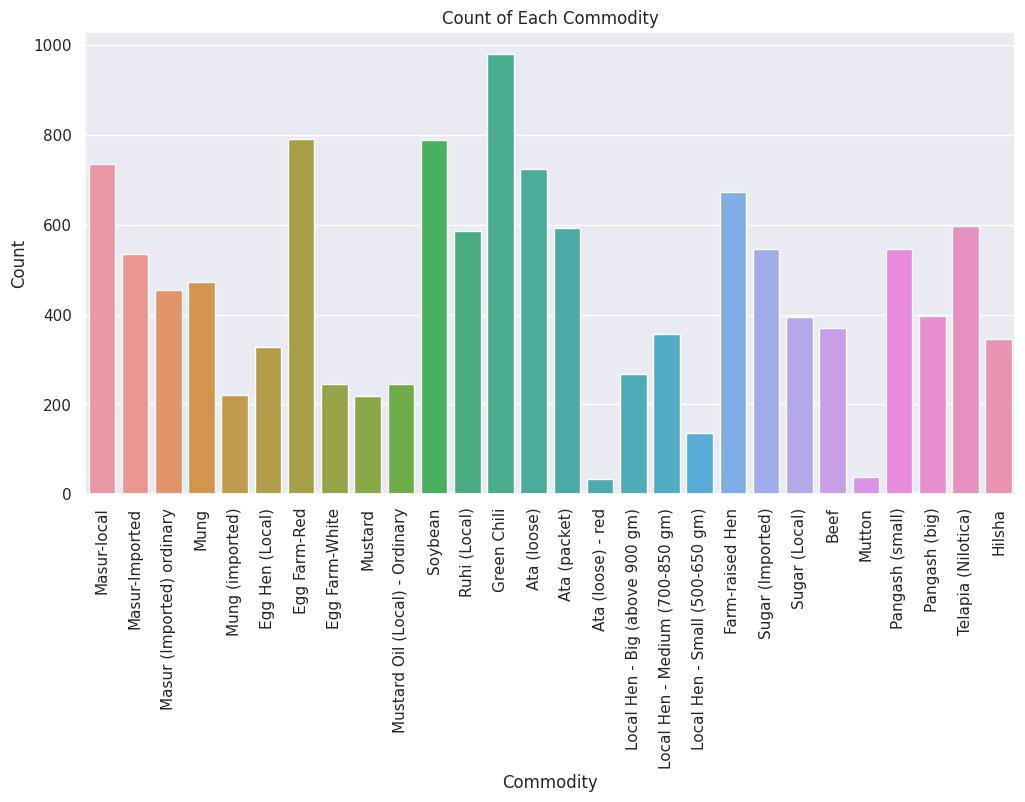

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(data=df, x='Commodity')

# Set the x-label rotation for better visibility if needed
plt.xticks(rotation=90)

# Set the axis labels and title
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.title('Count of Each Commodity')

# Display the plot
plt.show()

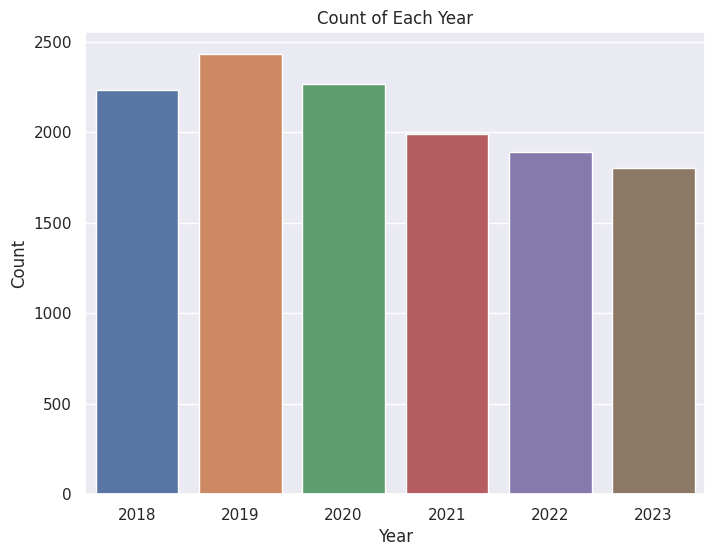

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the countplot
sns.countplot(data=df, x='Year')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Each Year')

# Display the plot
plt.show()

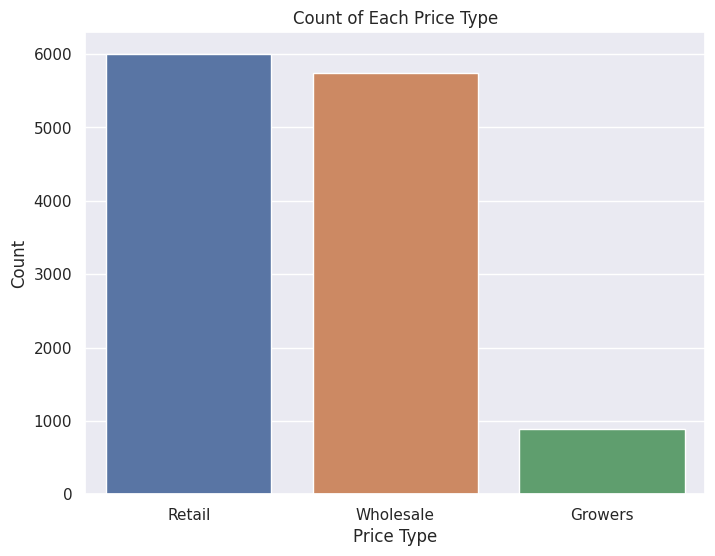

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the countplot
sns.countplot(data=df, x='Price Type')

# Set the axis labels and title
plt.xlabel('Price Type')
plt.ylabel('Count')
plt.title('Count of Each Price Type')

# Display the plot
plt.show()


<ipython-input-17-d1395717ed9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')


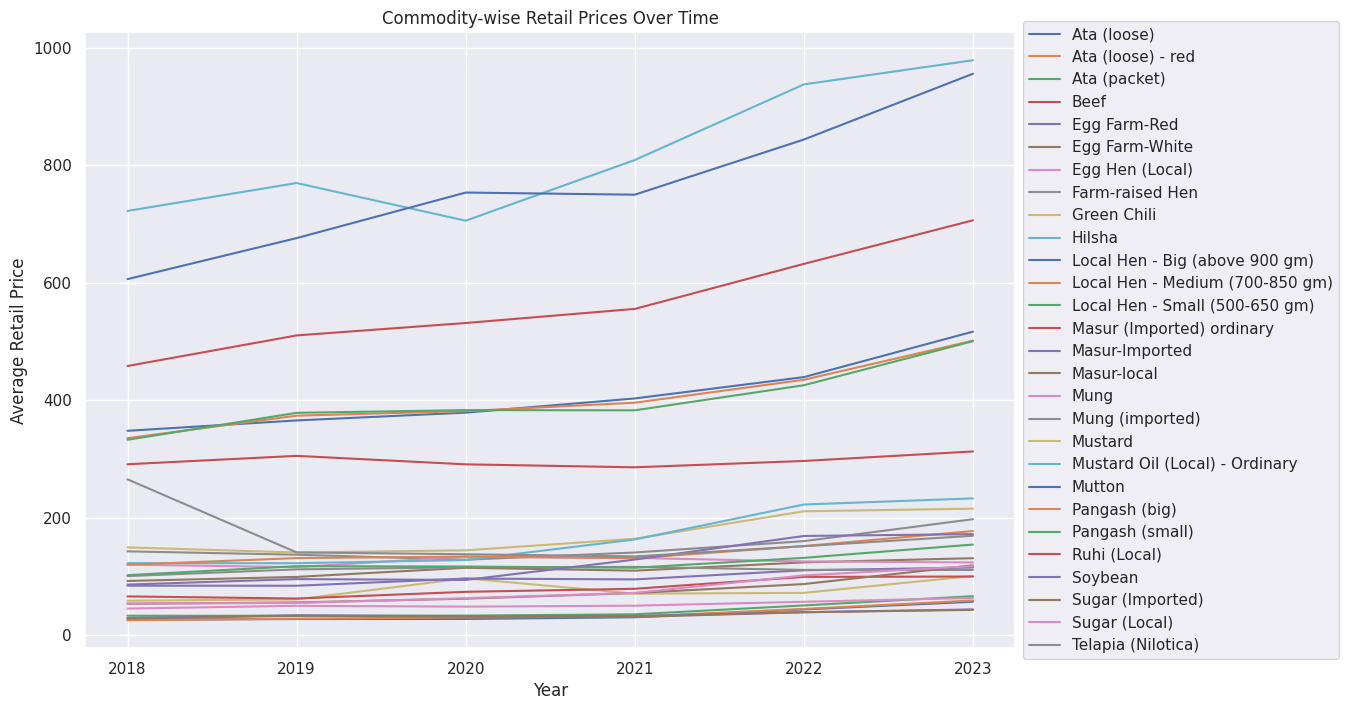

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for the "Retail" price type
retail_data = df[df['Price Type'] == 'Retail']

# Convert the Average Price column to numeric, ignoring non-convertible values
retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')

# Aggregate duplicate entries by taking the average retail price
retail_data = retail_data.groupby(['Year', 'Commodity'])['Average Price'].mean().reset_index()

# Pivot the data to have commodities as columns and years as index
pivot_data = retail_data.pivot(index='Year', columns='Commodity', values='Average Price')

# Create line chart for commodity-wise retail prices over time
plt.figure(figsize=(12, 8))
for commodity in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[commodity], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Retail Price')
plt.title('Commodity-wise Retail Prices Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


<ipython-input-18-2b5ef251a783>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')


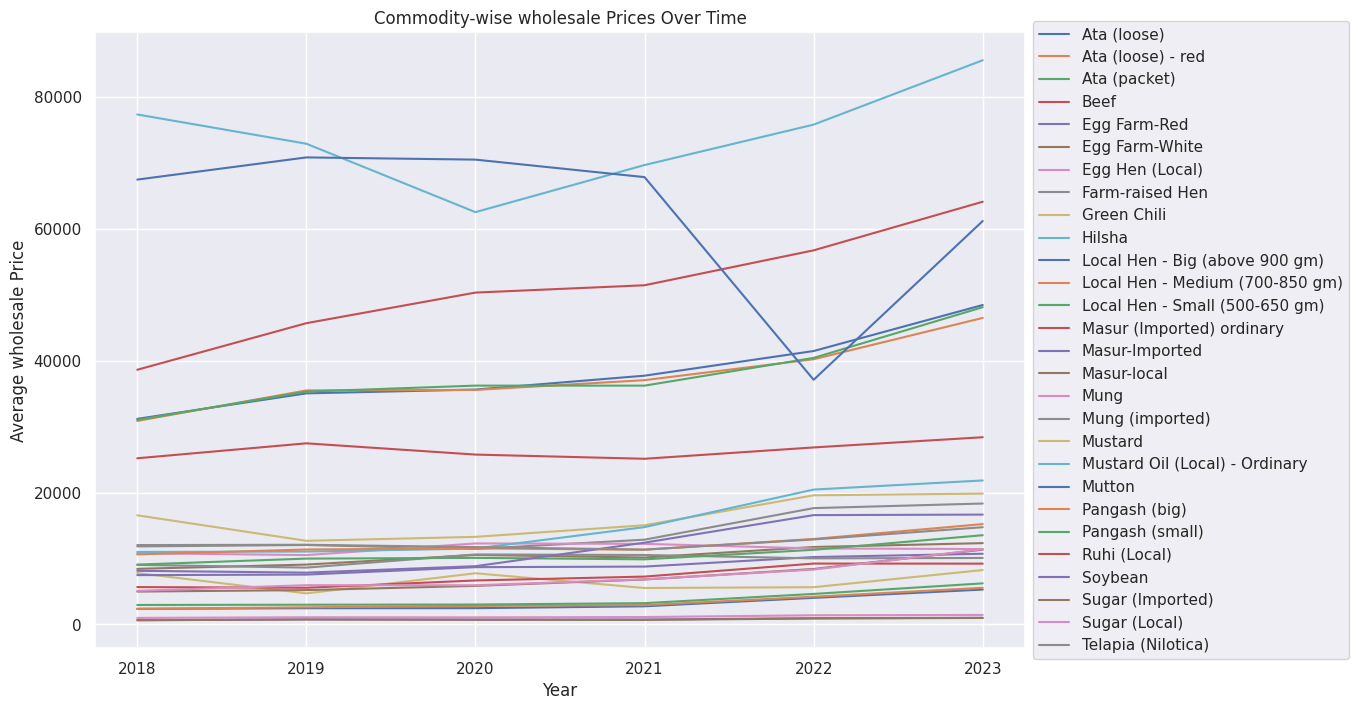

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for the "Retail" price type
wholesale_data = df[df['Price Type'] == 'Wholesale']

# Convert the Average Price column to numeric, ignoring non-convertible values
wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')

# Aggregate duplicate entries by taking the average retail price
wholesale_data = wholesale_data.groupby(['Year', 'Commodity'])['Average Price'].mean().reset_index()

# Pivot the data to have commodities as columns and years as index
pivot_data = wholesale_data.pivot(index='Year', columns='Commodity', values='Average Price')

# Create line chart for commodity-wise retail prices over time
plt.figure(figsize=(12, 8))
for commodity in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[commodity], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average wholesale Price')
plt.title('Commodity-wise wholesale Prices Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


<ipython-input-19-d3dadba829ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')


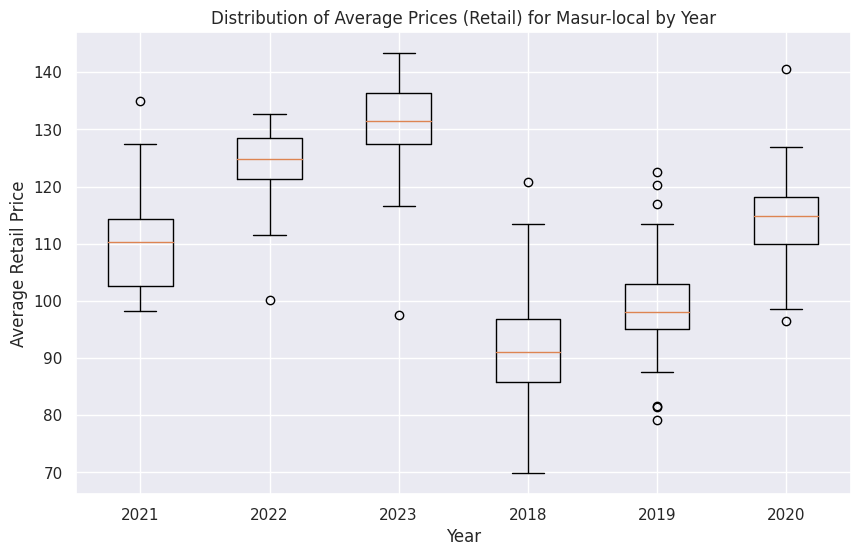

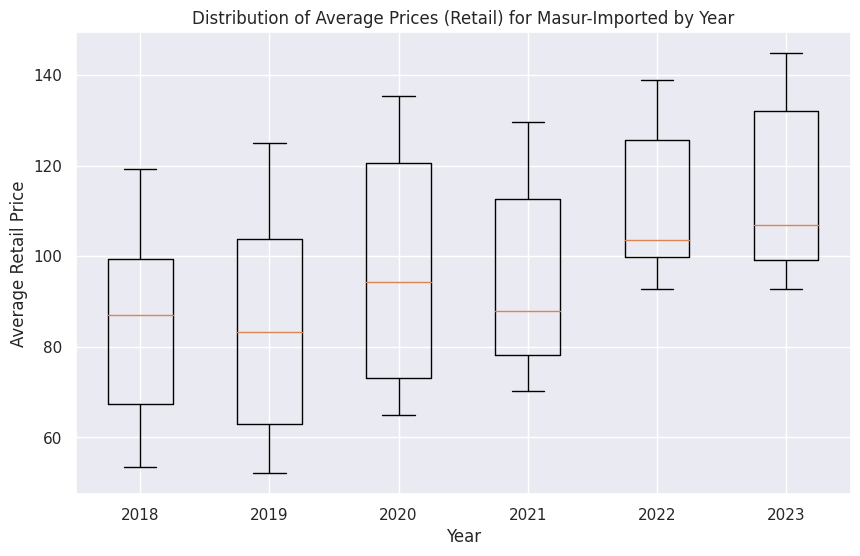

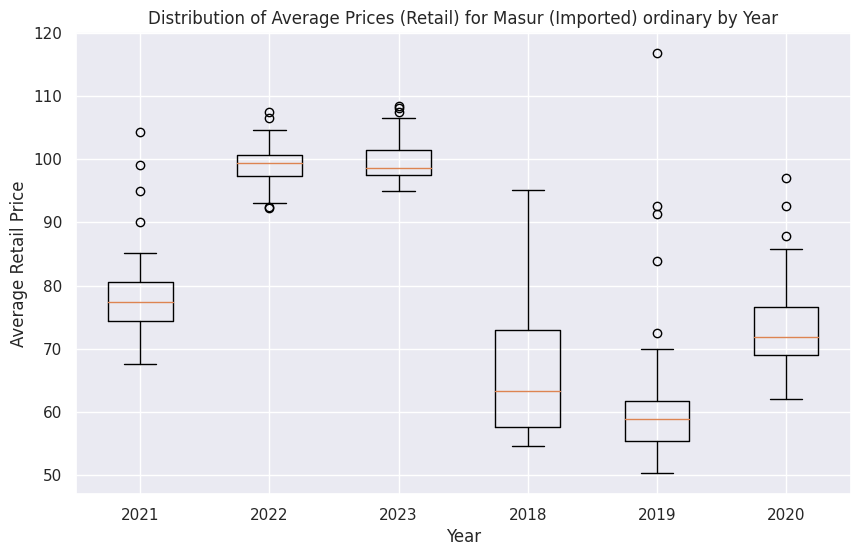

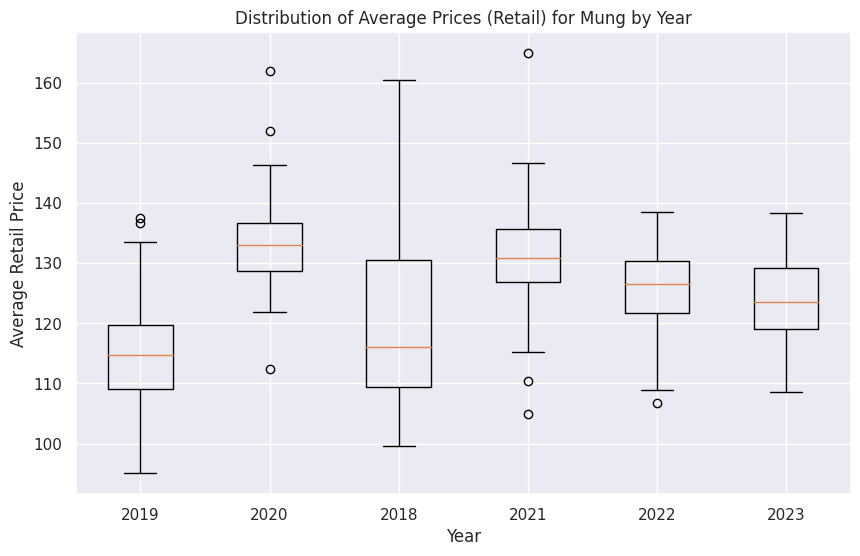

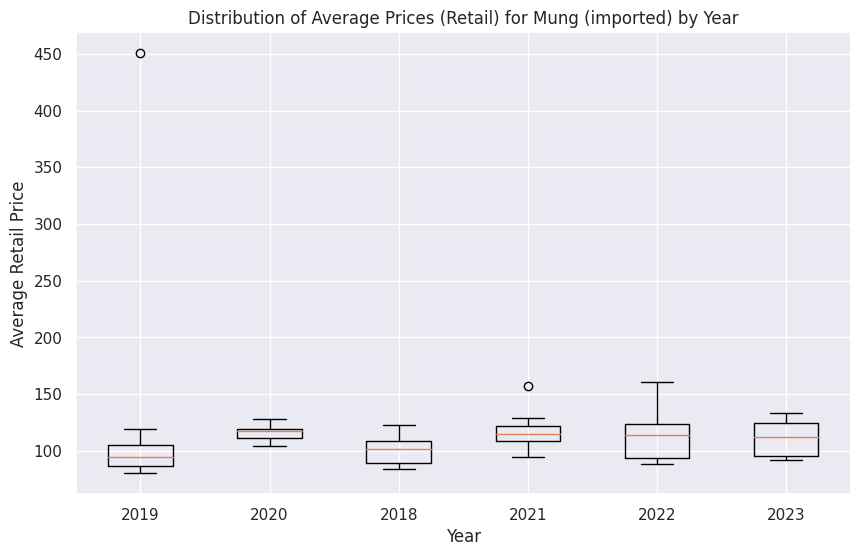

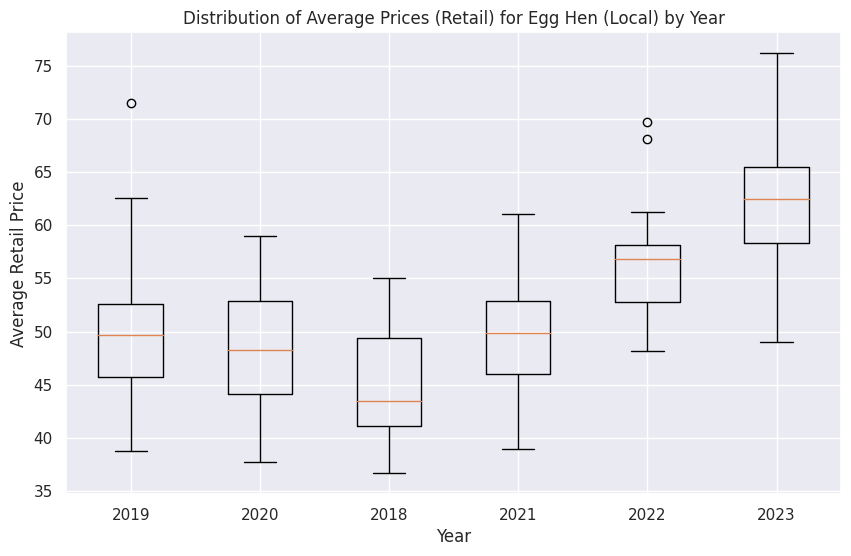

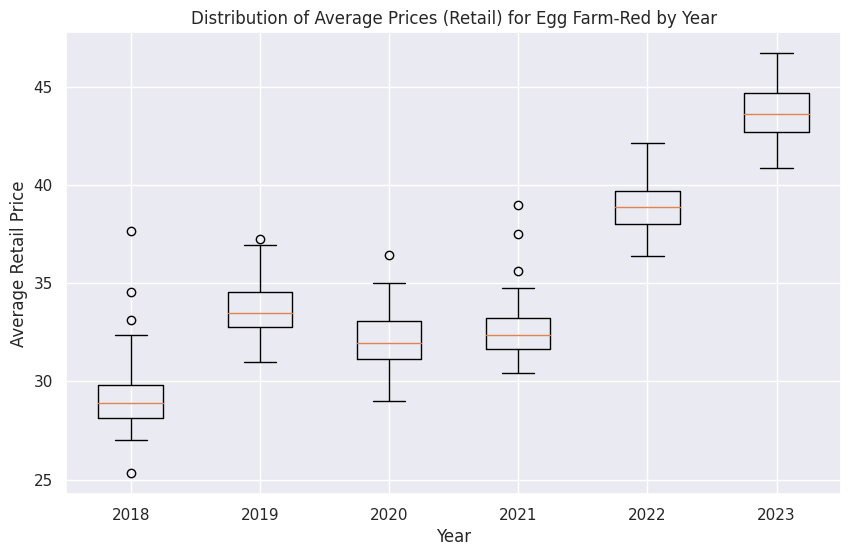

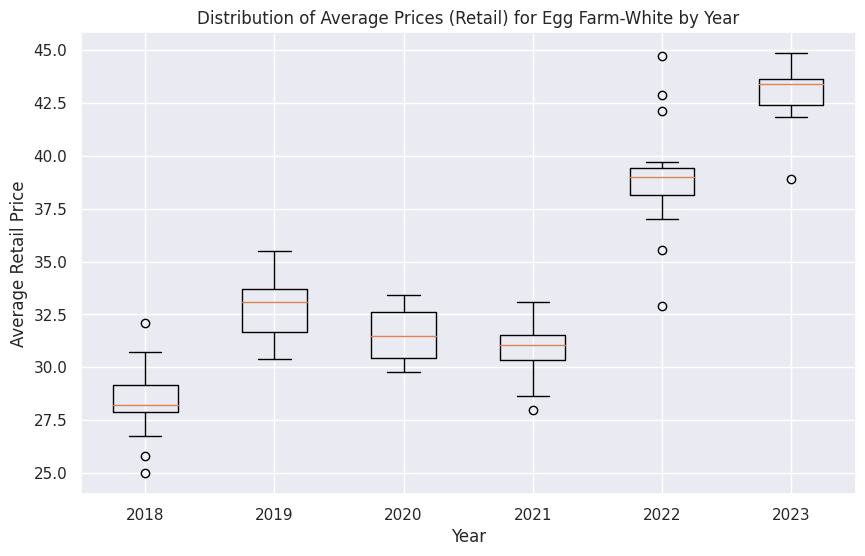

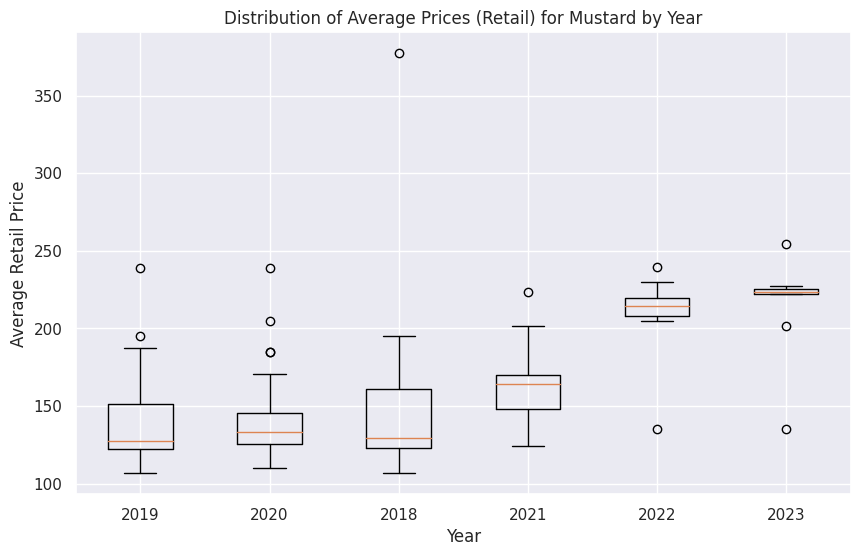

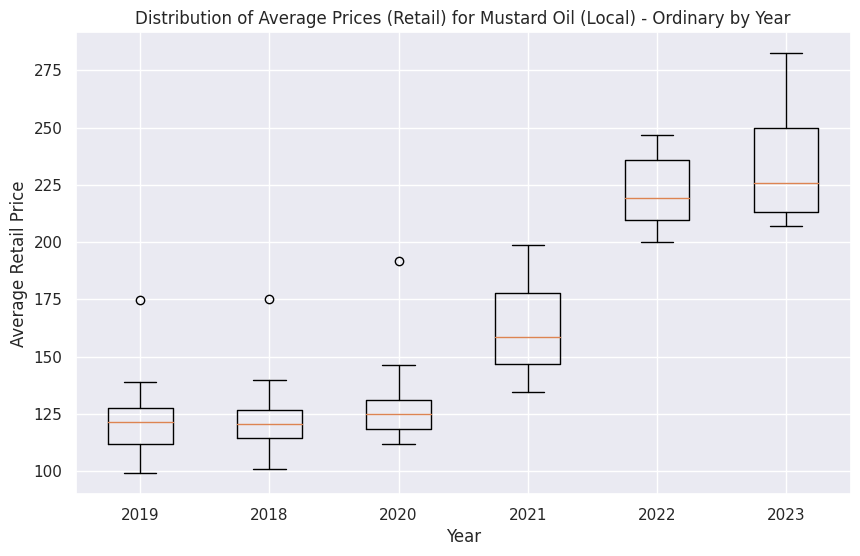

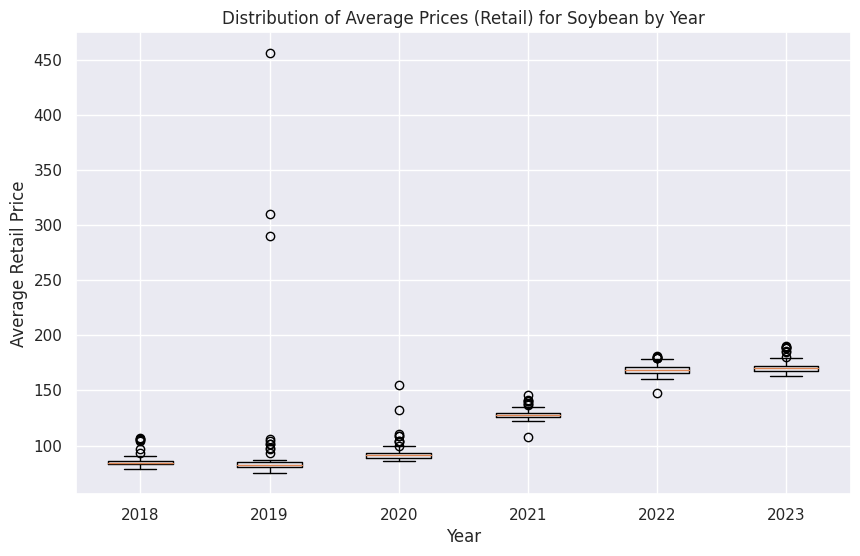

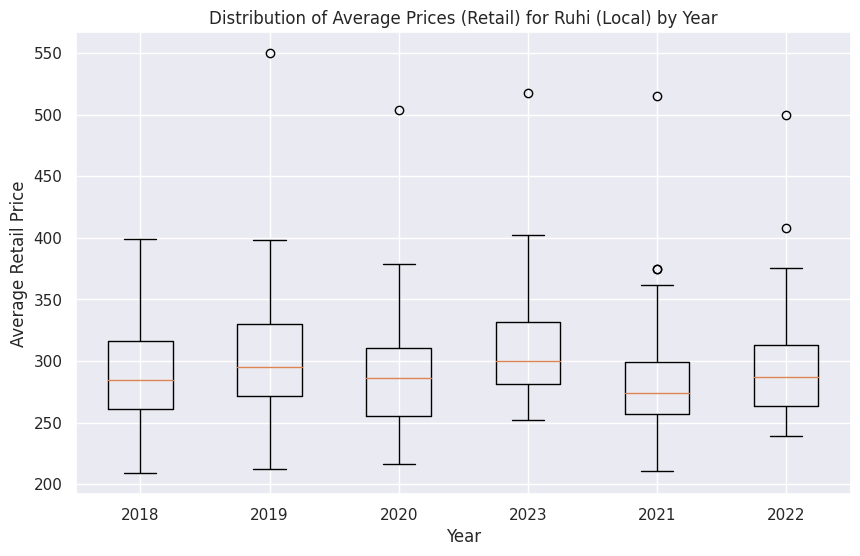

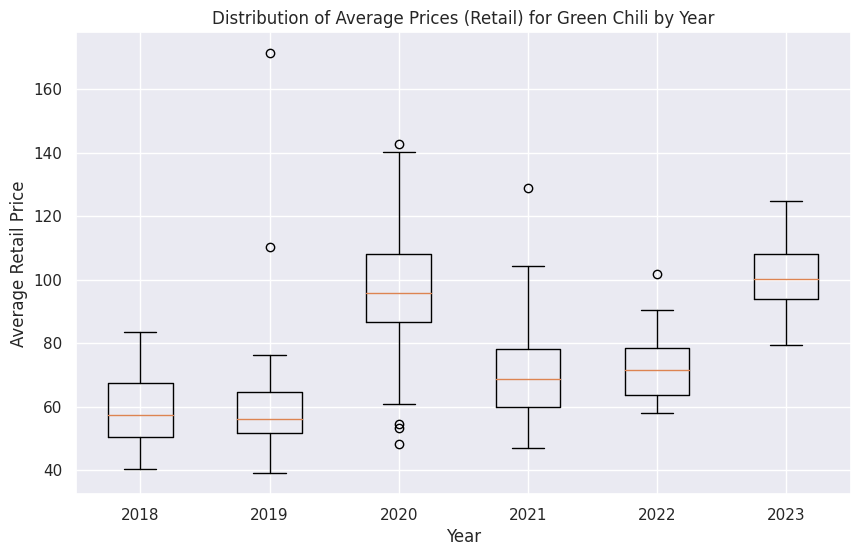

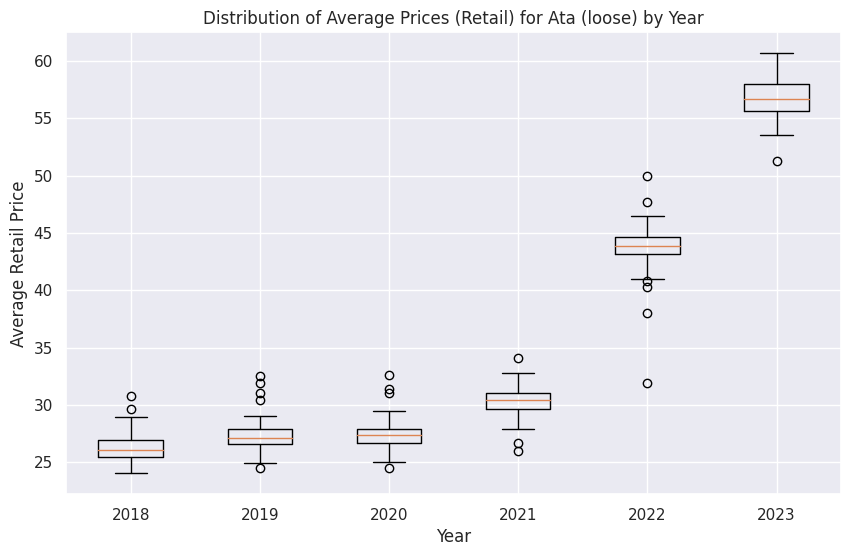

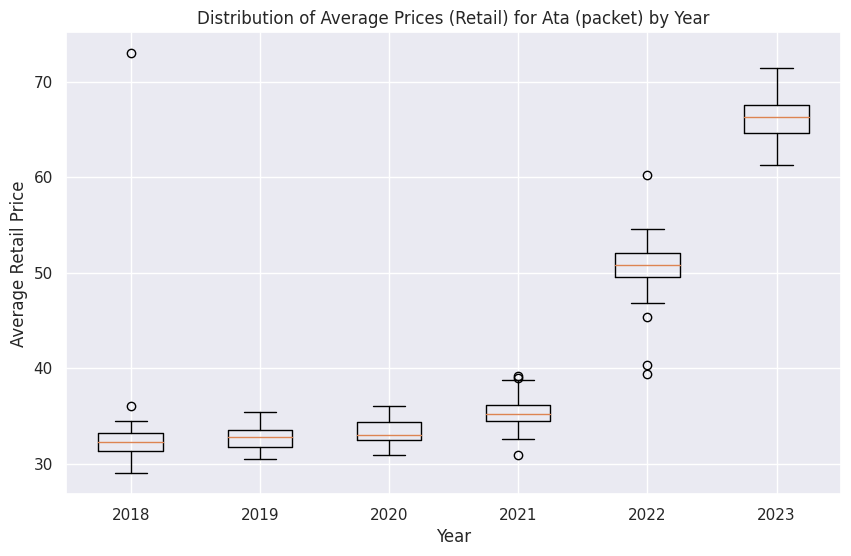

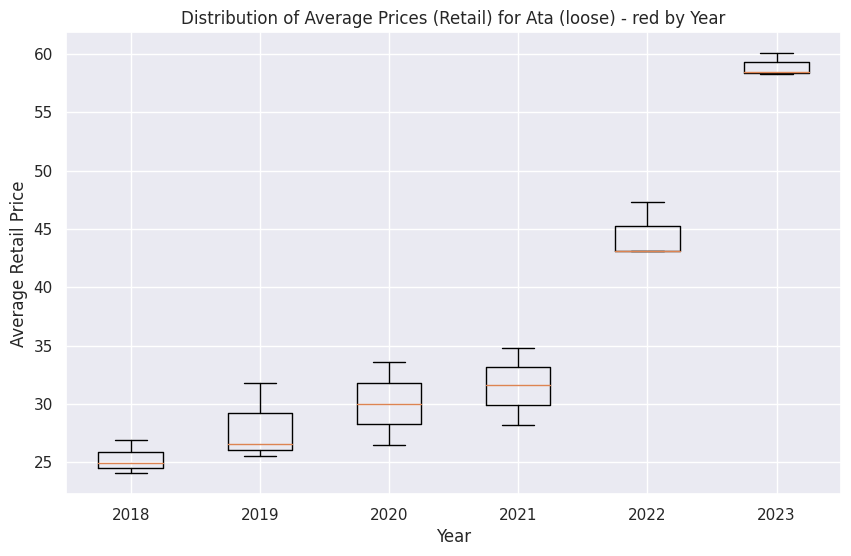

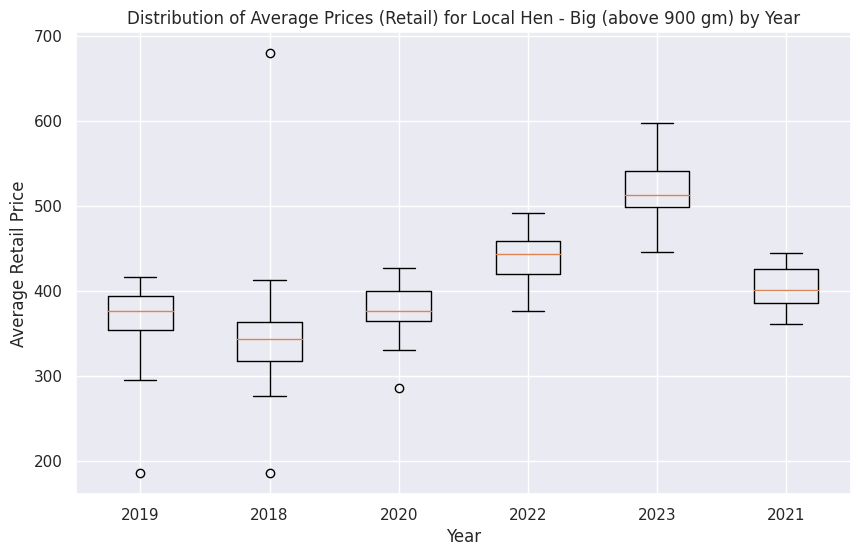

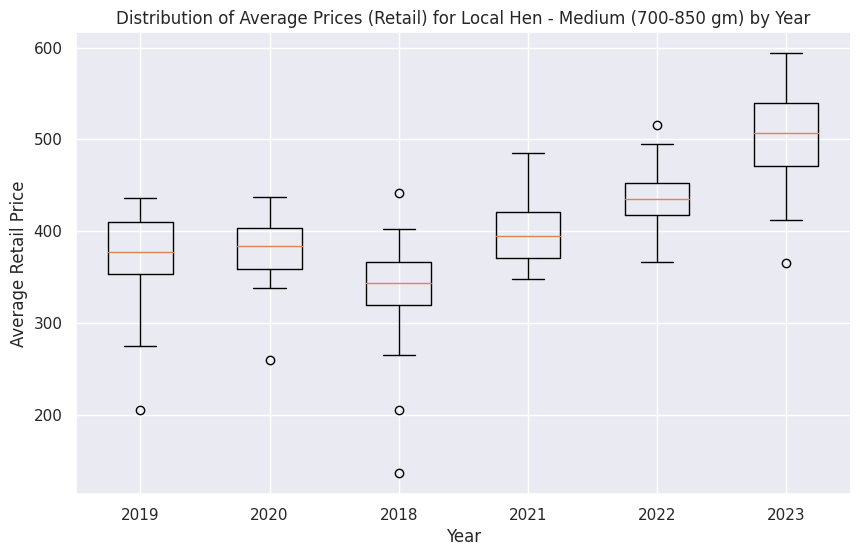

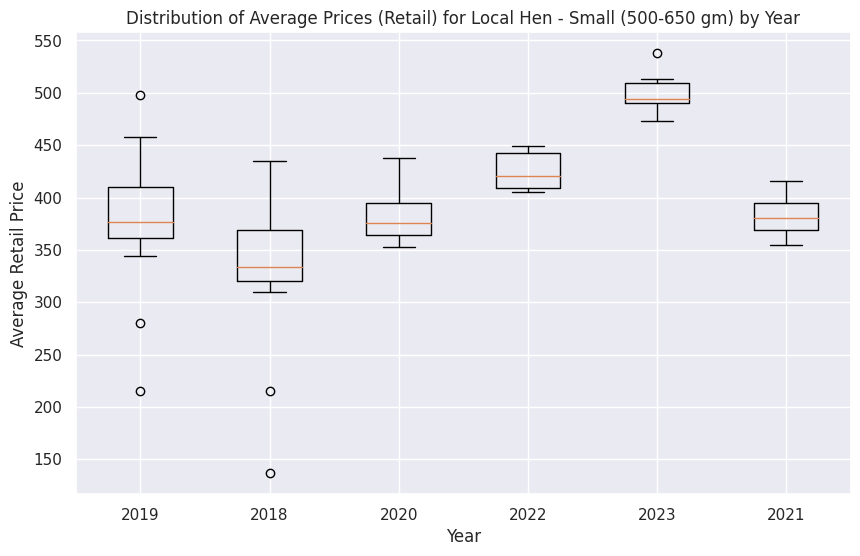

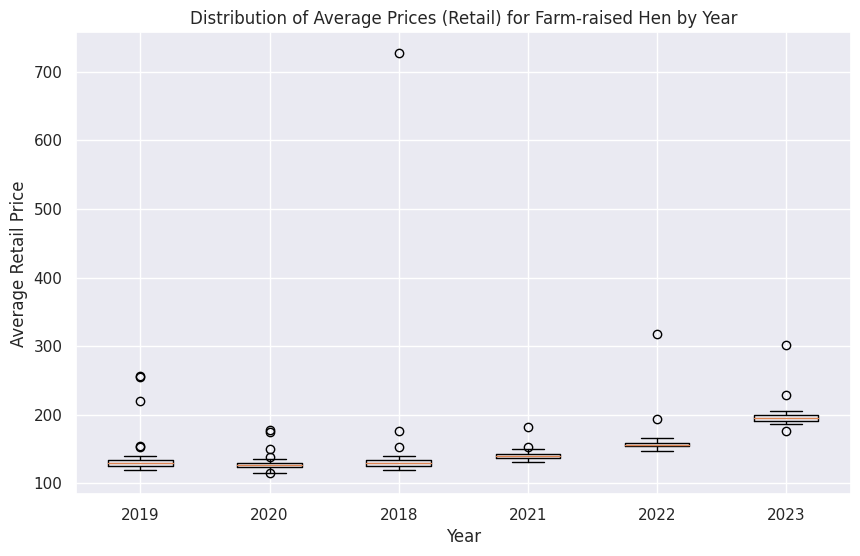

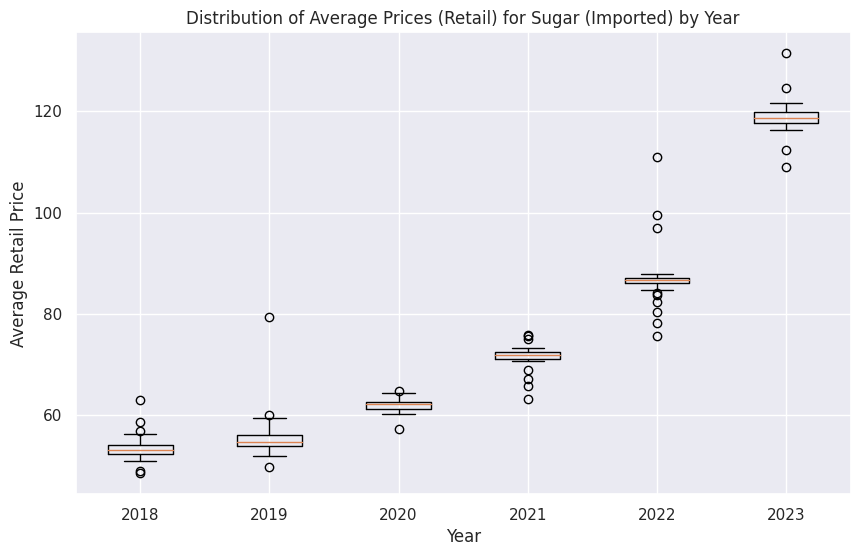

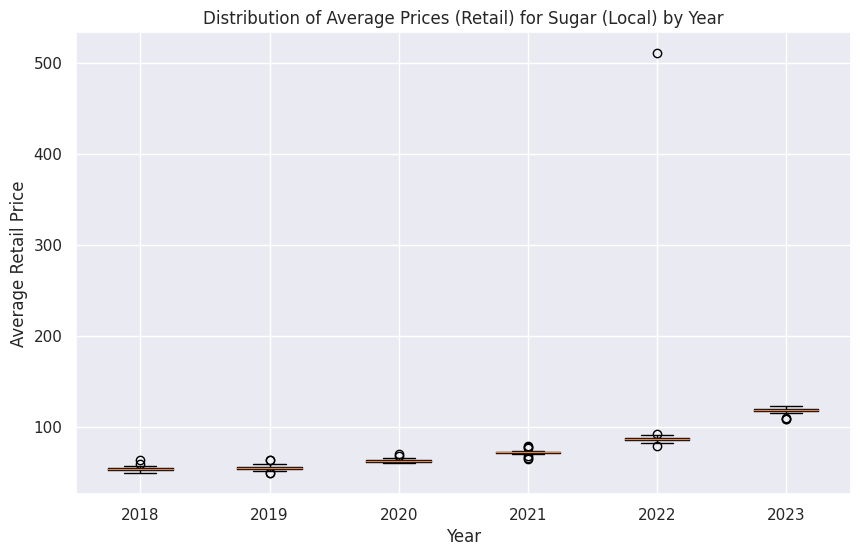

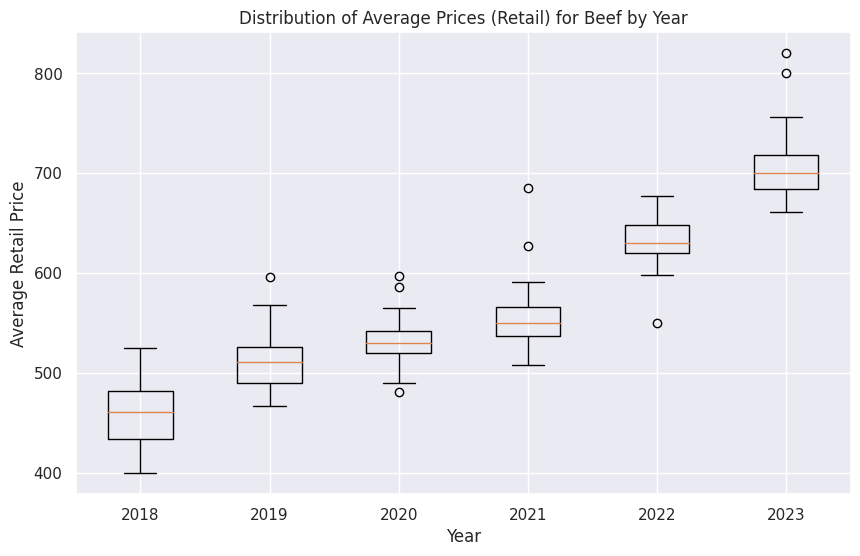

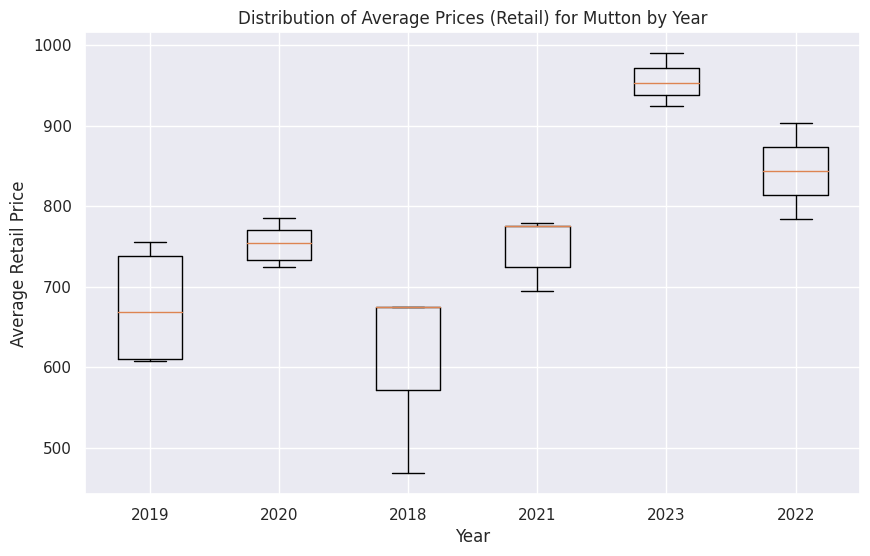

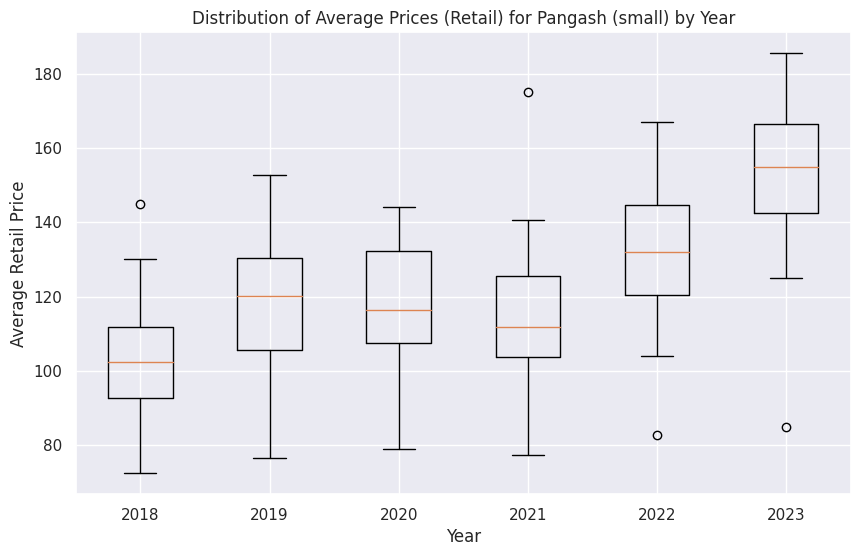

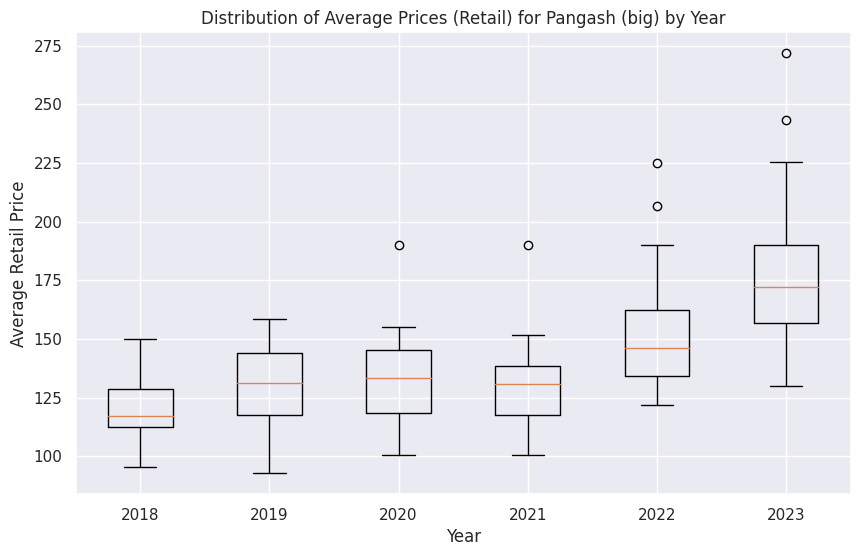

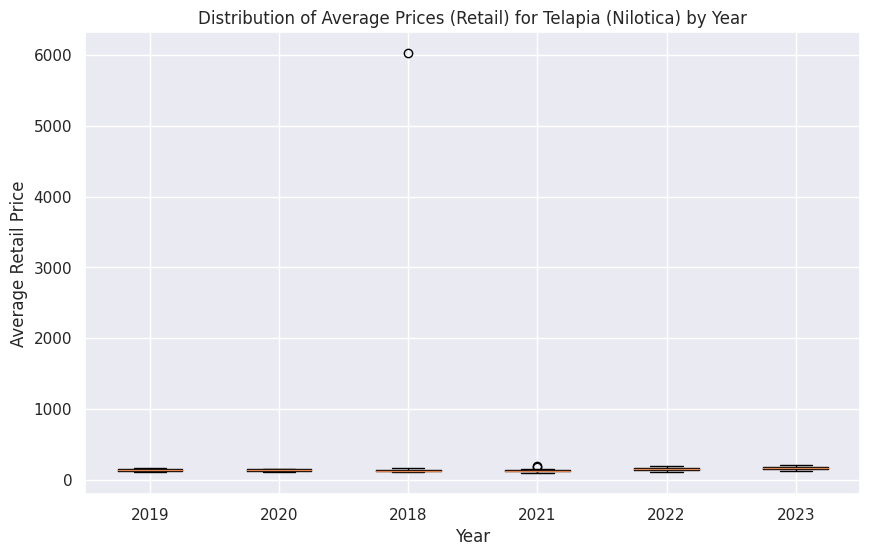

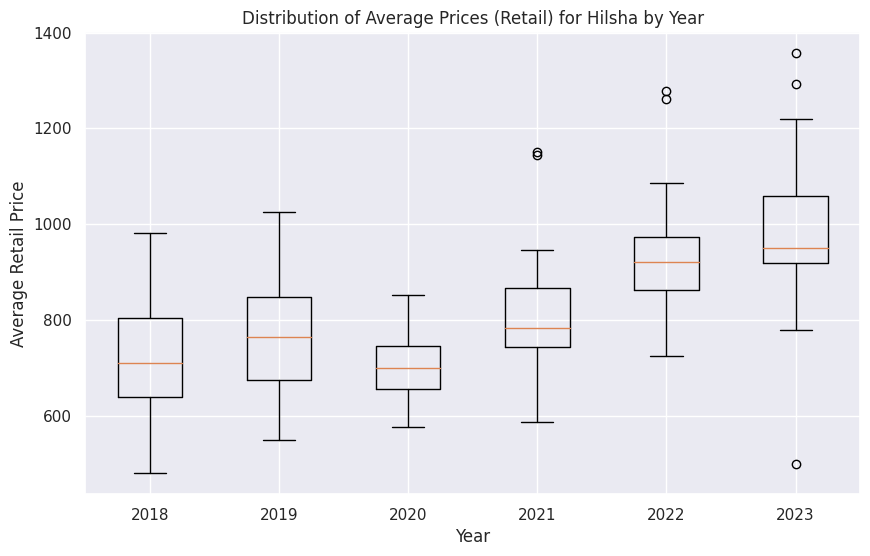

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for Retail price type
retail_data = df[df['Price Type'] == 'Retail']

# Convert the Average Price column to numeric, ignoring non-convertible values
retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')

# Get unique commodities
commodities = retail_data['Commodity'].unique()

# Iterate over each unique commodity
for commodity in commodities:
    # Filter the data for the current commodity
    commodity_data = retail_data[retail_data['Commodity'] == commodity]

    # Create a box plot for average retail prices by year
    plt.figure(figsize=(10, 6))
    plt.boxplot([commodity_data[commodity_data['Year'] == year]['Average Price'] for year in commodity_data['Year'].unique()])
    plt.xlabel('Year')
    plt.ylabel('Average Retail Price')
    plt.title(f'Distribution of Average Prices (Retail) for {commodity} by Year')
    plt.xticks(range(1, len(commodity_data['Year'].unique()) + 1), commodity_data['Year'].unique())
    plt.grid(True)
    plt.show()


<ipython-input-20-2a6580779609>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')


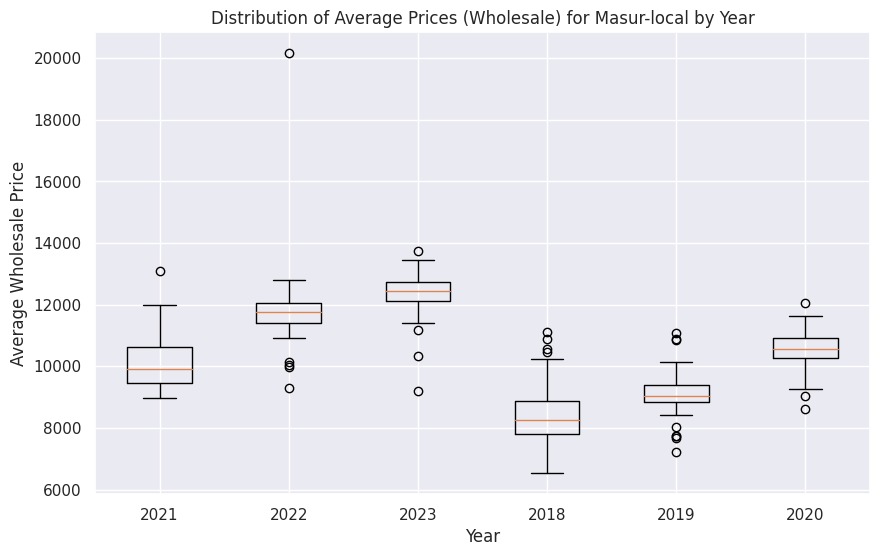

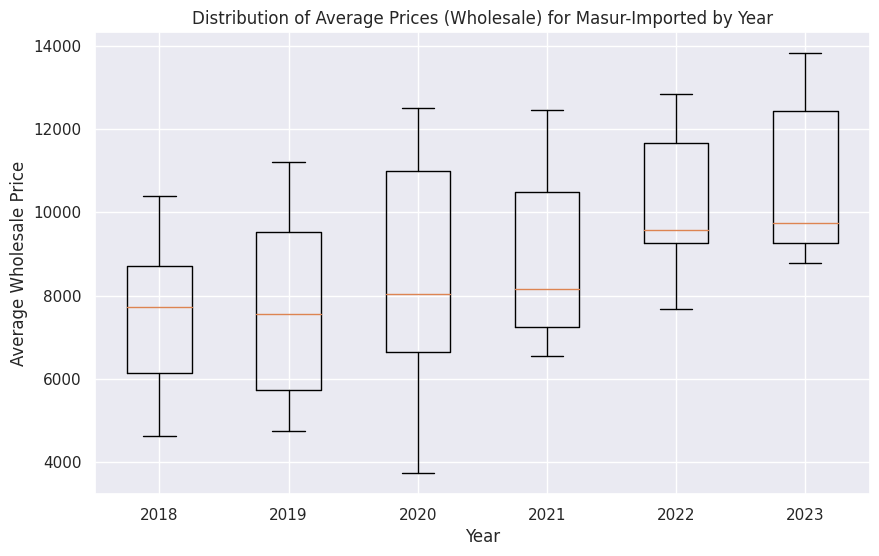

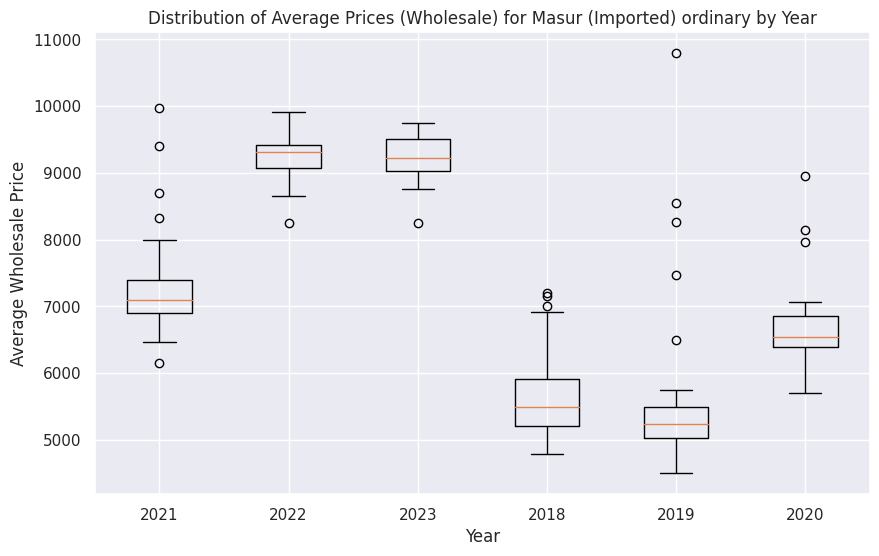

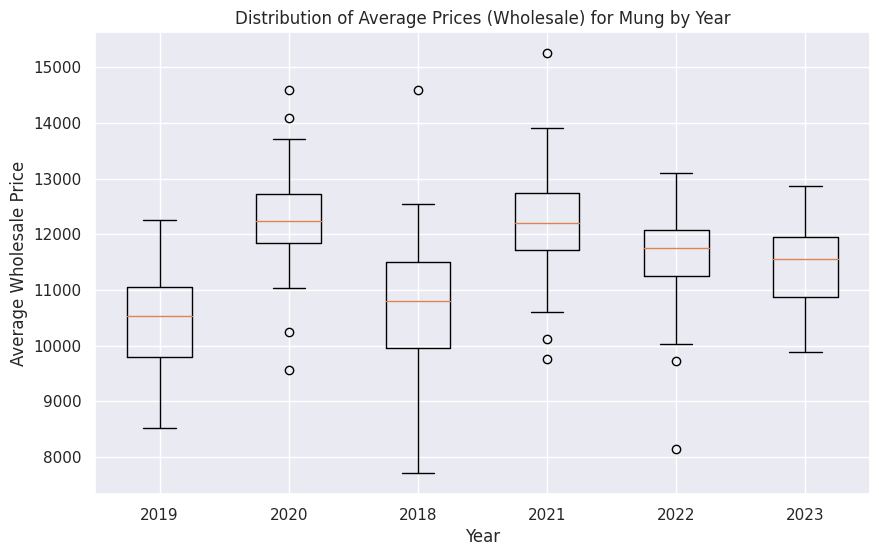

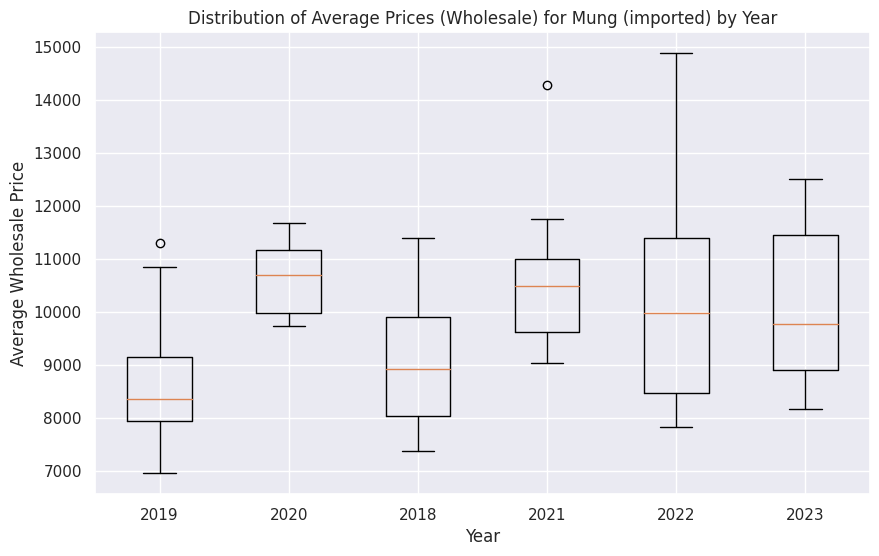

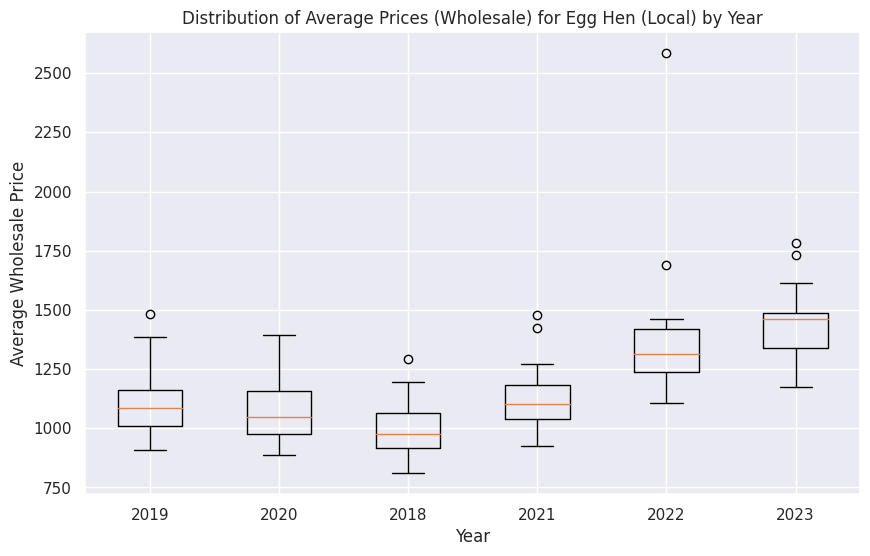

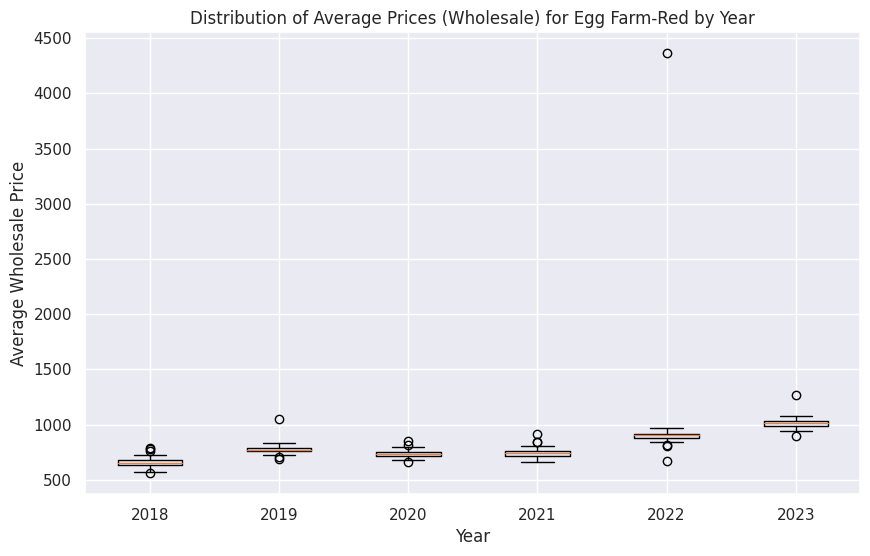

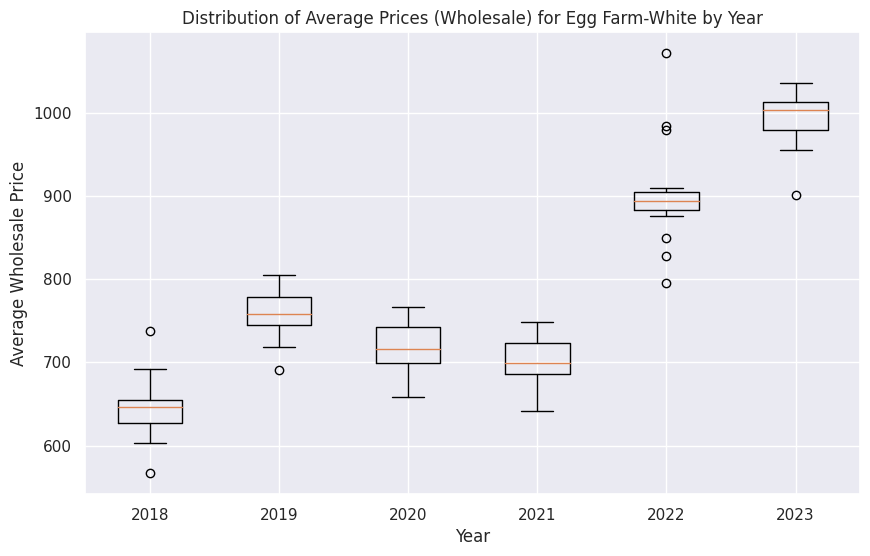

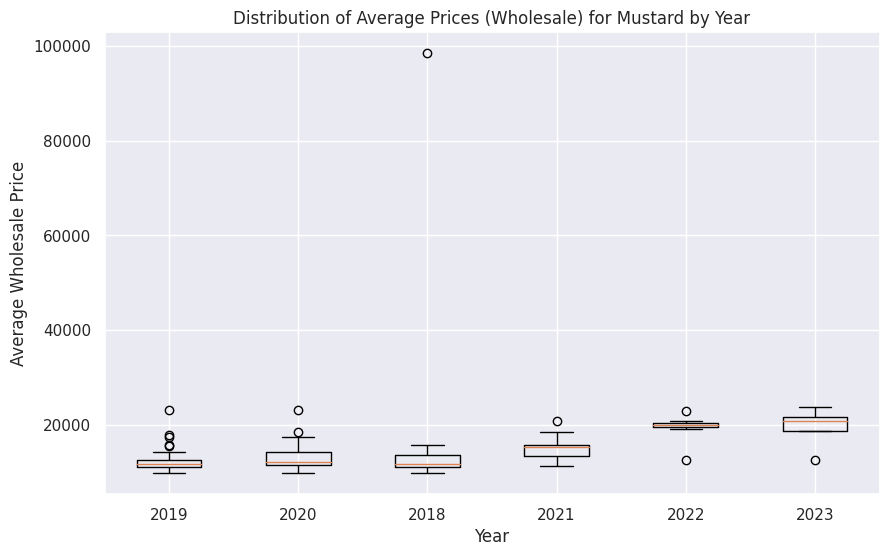

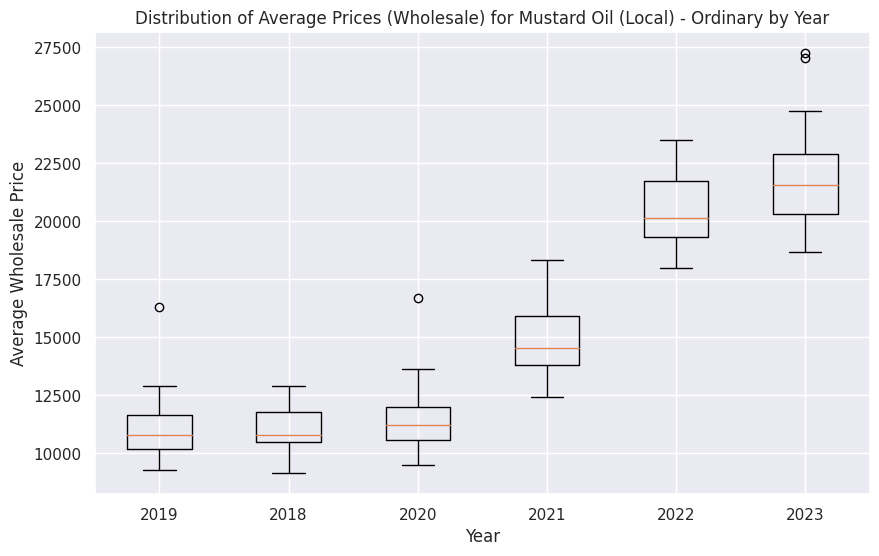

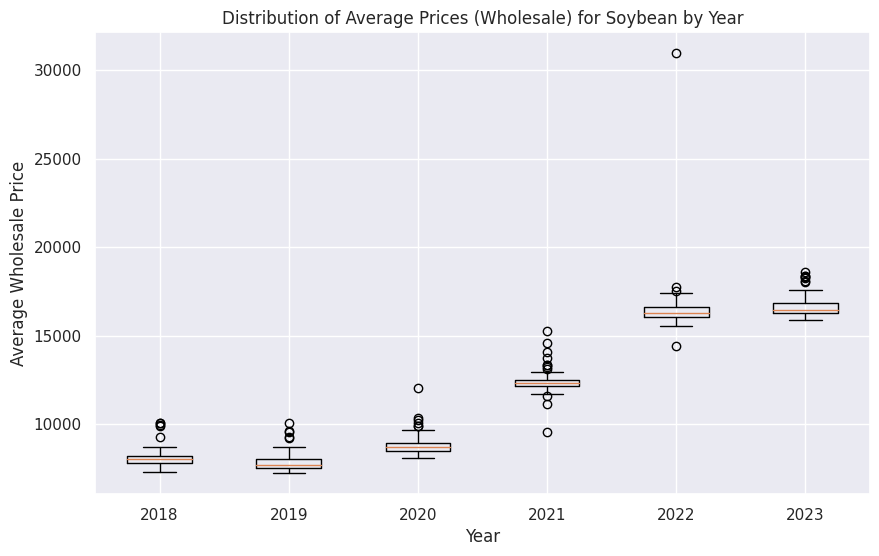

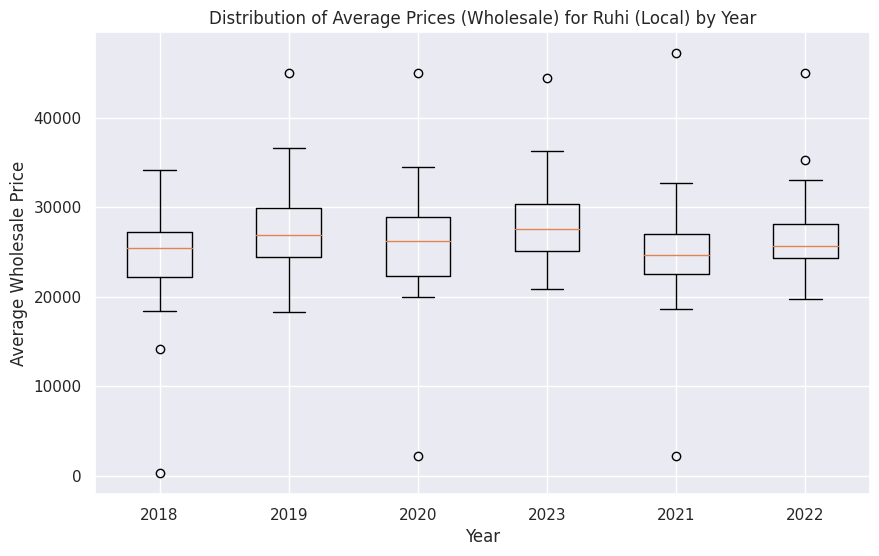

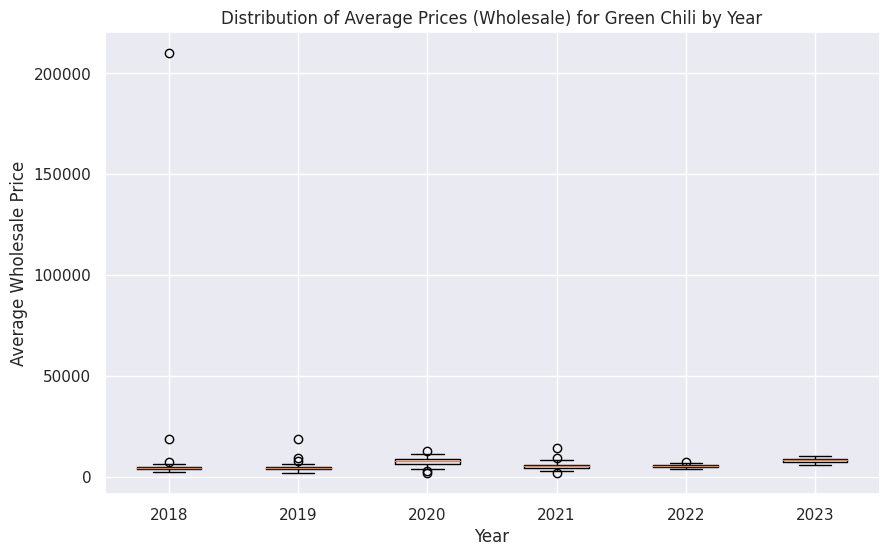

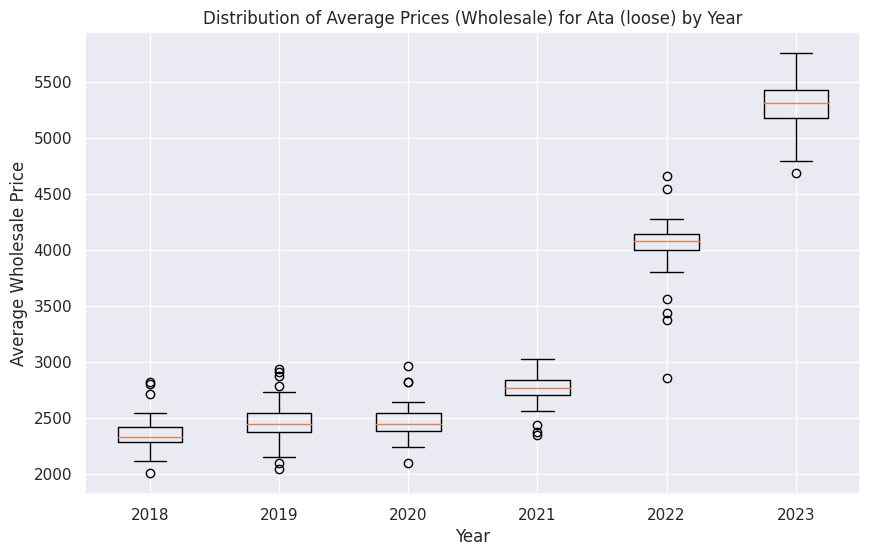

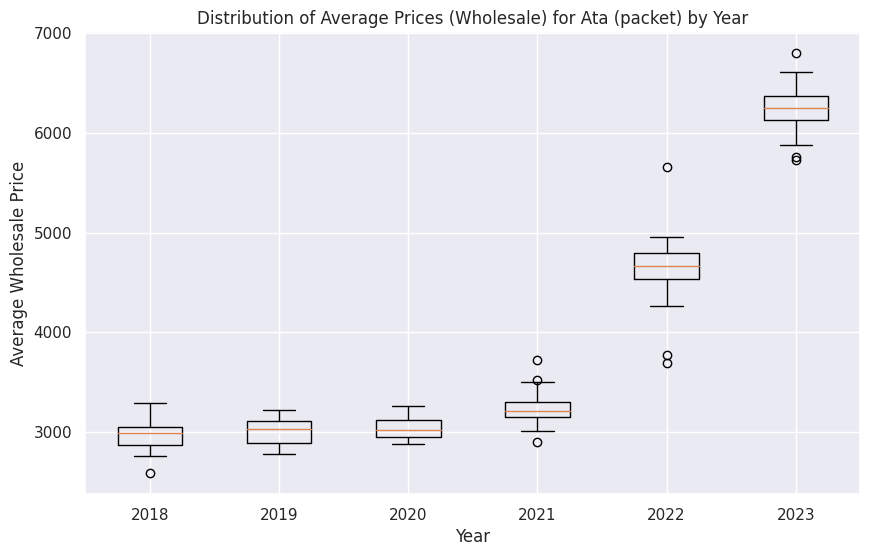

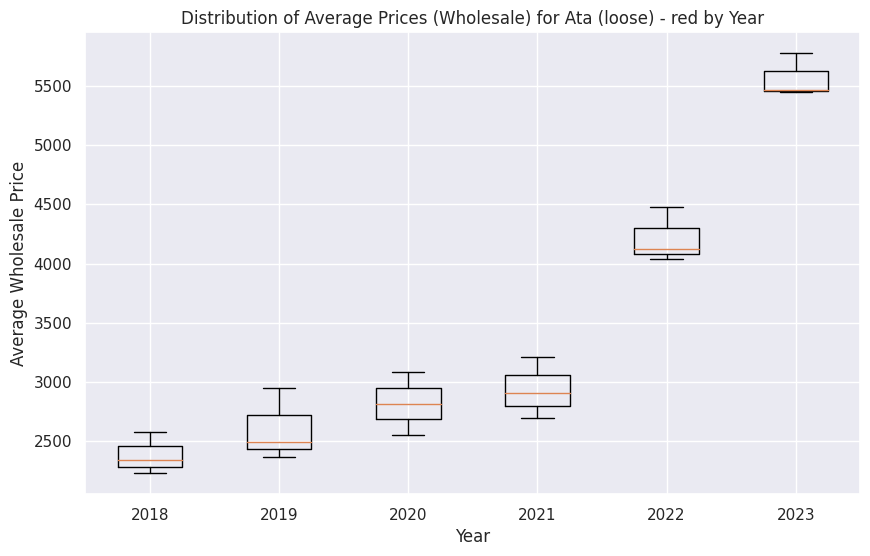

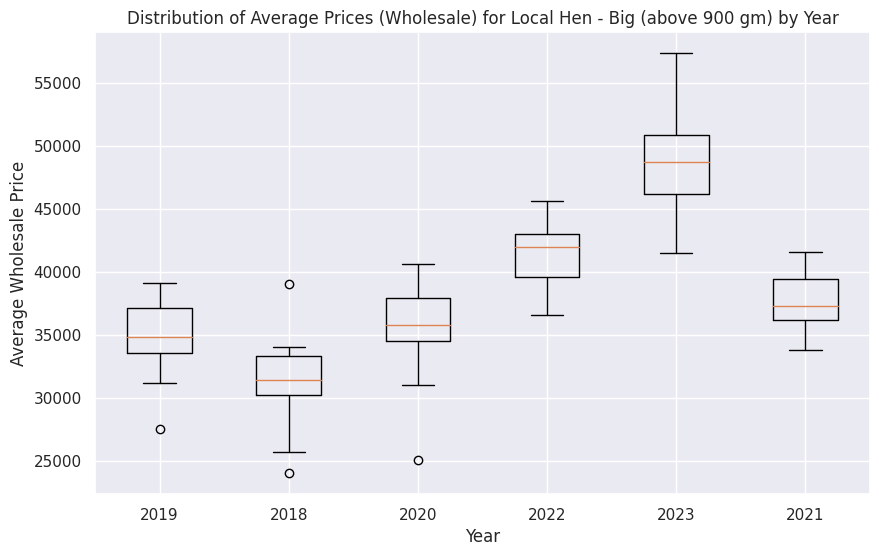

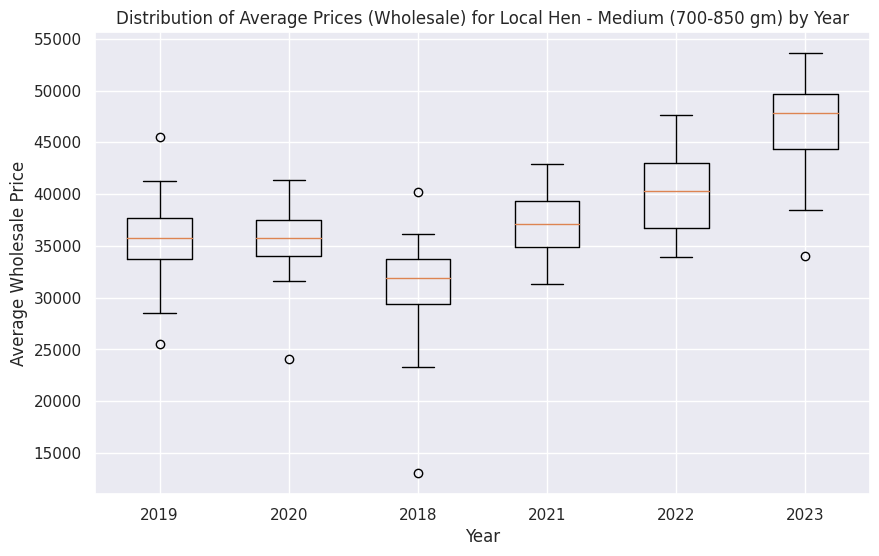

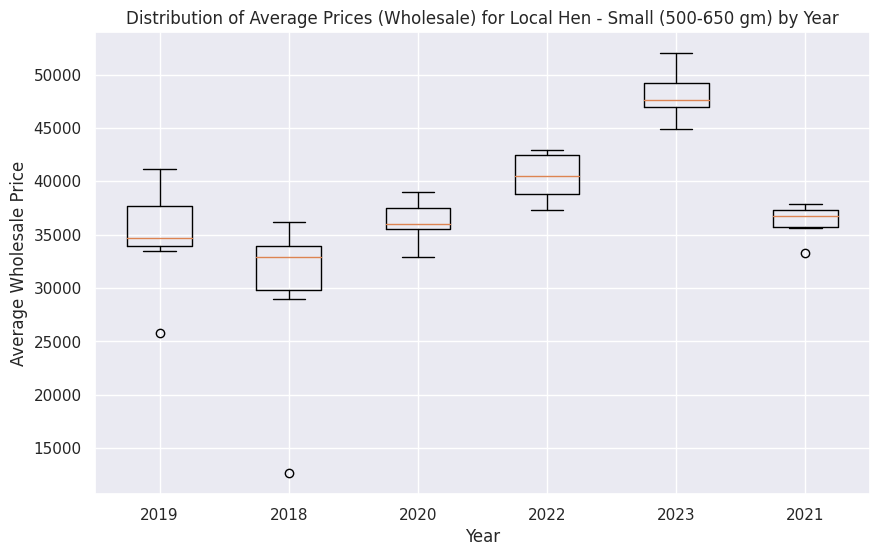

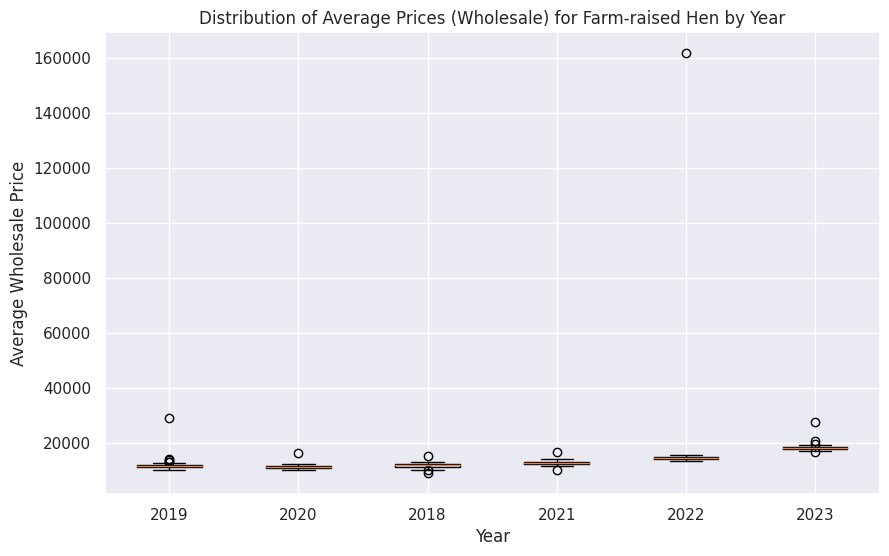

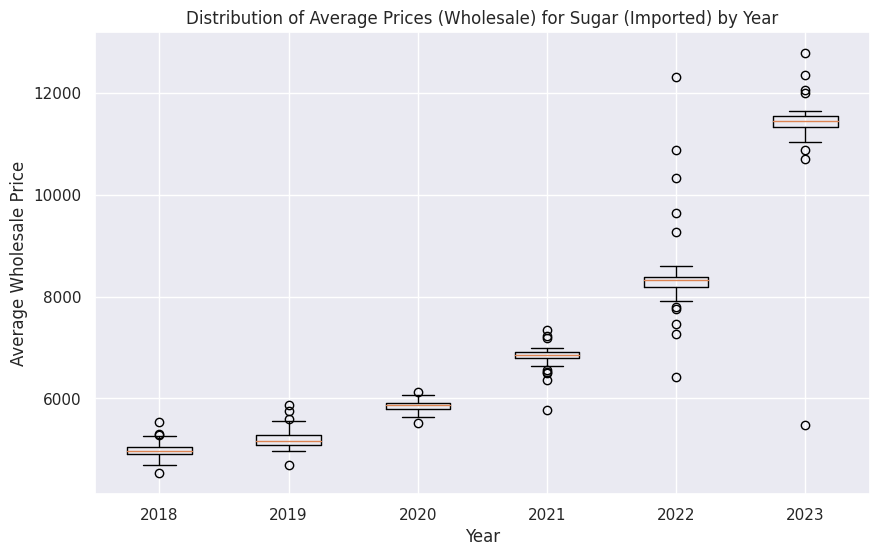

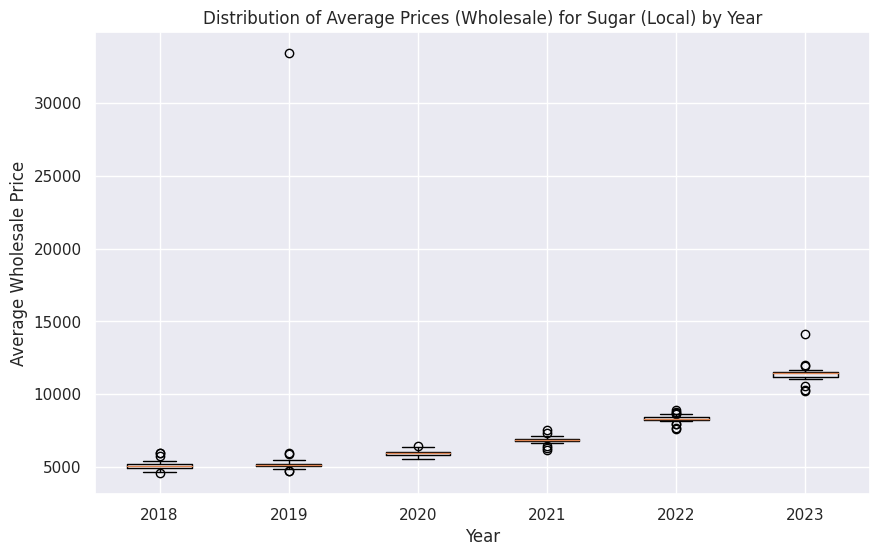

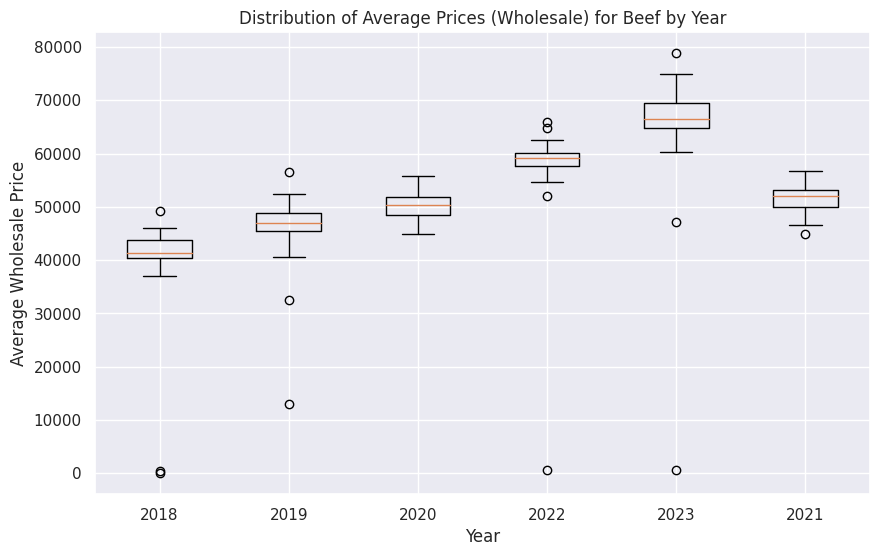

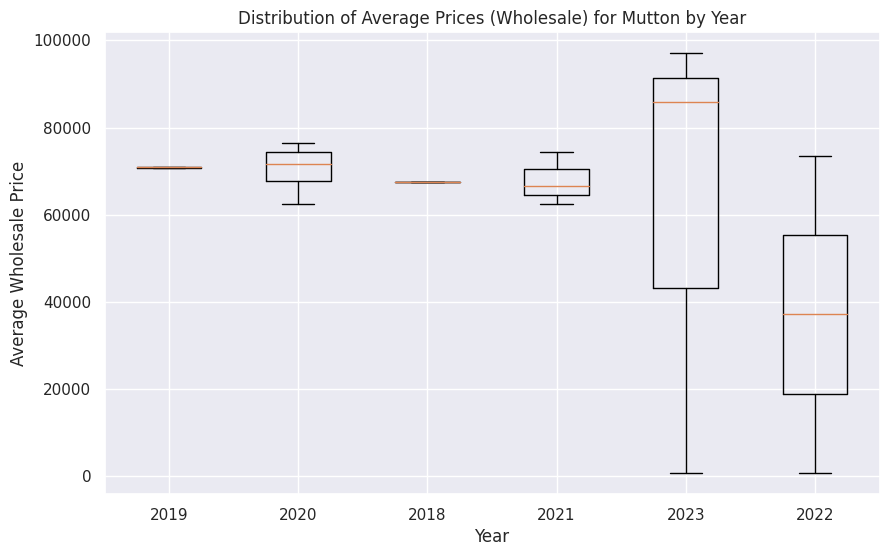

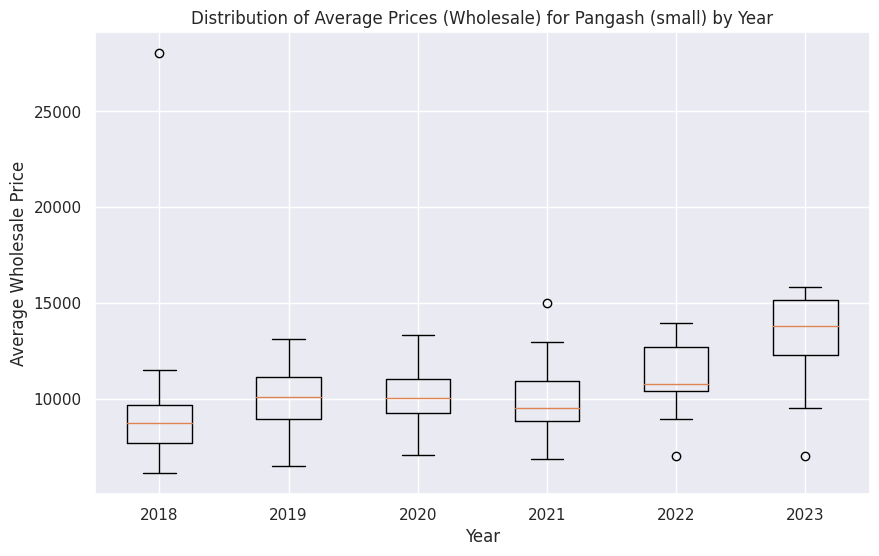

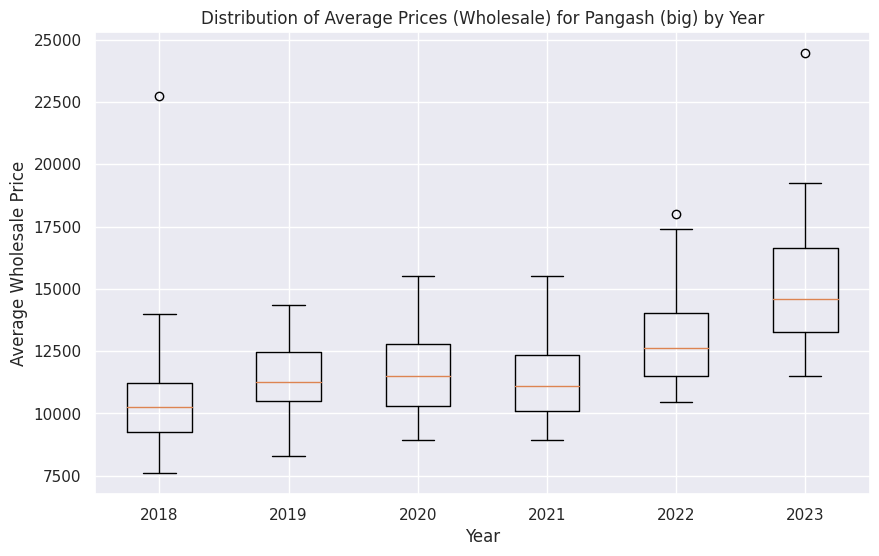

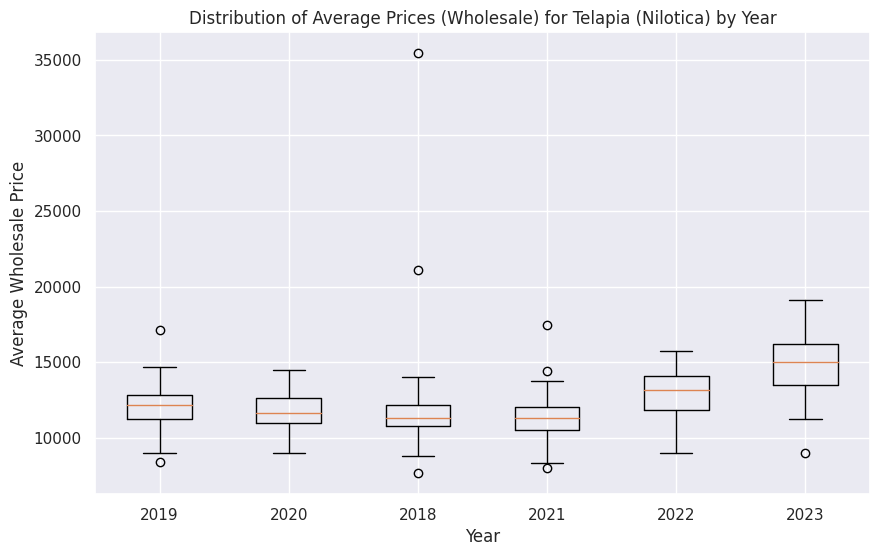

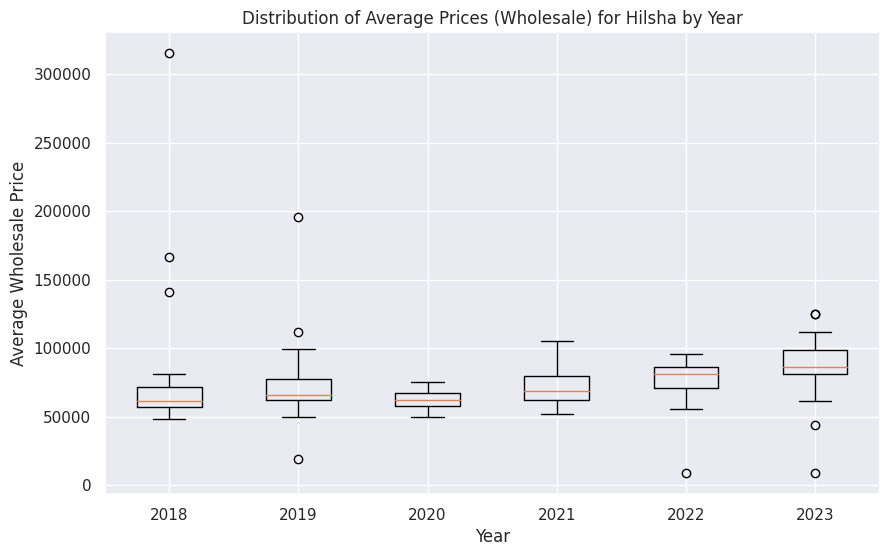

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for Wholesale price type
wholesale_data = df[df['Price Type'] == 'Wholesale']

# Convert the Average Price column to numeric, ignoring non-convertible values
wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')

# Get unique commodities
commodities = wholesale_data['Commodity'].unique()

# Iterate over each unique commodity
for commodity in commodities:
    # Filter the data for the current commodity
    commodity_data = wholesale_data[wholesale_data['Commodity'] == commodity]

    # Create a box plot for average wholesale prices by year
    plt.figure(figsize=(10, 6))
    plt.boxplot([commodity_data[commodity_data['Year'] == year]['Average Price'] for year in commodity_data['Year'].unique()])
    plt.xlabel('Year')
    plt.ylabel('Average Wholesale Price')
    plt.title(f'Distribution of Average Prices (Wholesale) for {commodity} by Year')
    plt.xticks(range(1, len(commodity_data['Year'].unique()) + 1), commodity_data['Year'].unique())
    plt.grid(True)
    plt.show()


<ipython-input-21-c2570ee182c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')


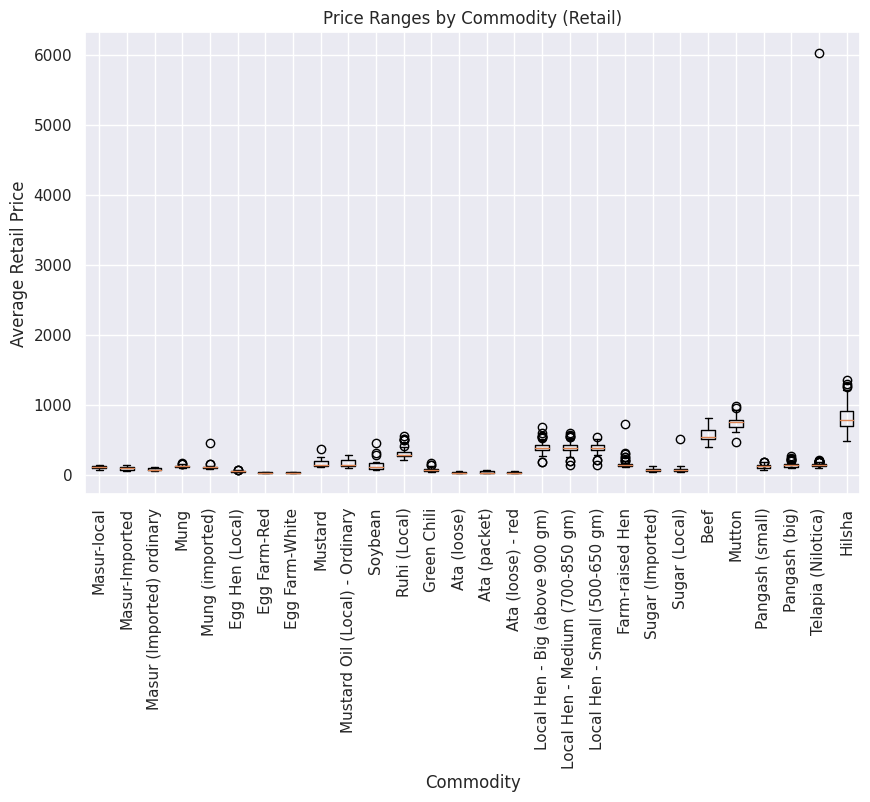

In [ ]:

# Filter the dataset for the "Retail" price type
retail_data = df[df['Price Type'] == 'Retail']

# Convert the Average Price column to numeric, ignoring non-convertible values
retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')

# Create a boxplot of average retail prices by commodity
plt.figure(figsize=(10, 6))
plt.boxplot([retail_data[retail_data['Commodity'] == commodity]['Average Price'] for commodity in retail_data['Commodity'].unique()])
plt.xlabel('Commodity')
plt.ylabel('Average Retail Price')
plt.title('Price Ranges by Commodity (Retail)')
plt.xticks(range(1, len(retail_data['Commodity'].unique()) + 1), retail_data['Commodity'].unique(), rotation=90)
plt.grid(True)
plt.show()


<ipython-input-22-3a3df5300de7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')


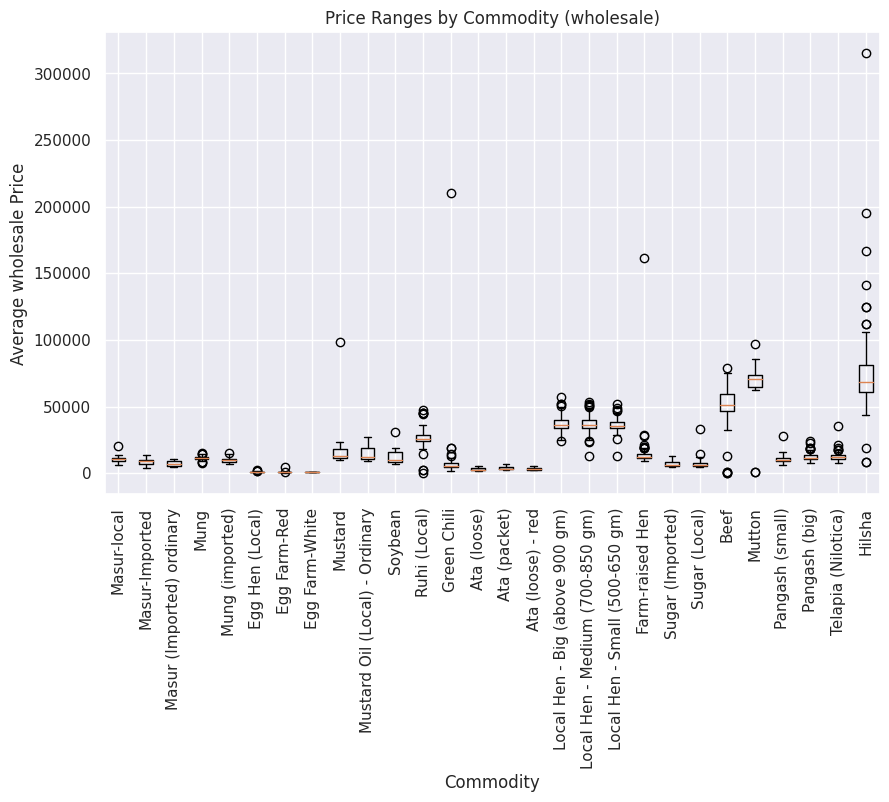

In [ ]:
# Filter the dataset for the "Retail" price type
wholesale_data = df[df['Price Type'] == 'Wholesale']

# Convert the Average Price column to numeric, ignoring non-convertible values
wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')

# Create a boxplot of average retail prices by commodity
plt.figure(figsize=(10, 6))
plt.boxplot([wholesale_data[wholesale_data['Commodity'] == commodity]['Average Price'] for commodity in wholesale_data['Commodity'].unique()])
plt.xlabel('Commodity')
plt.ylabel('Average wholesale Price')
plt.title('Price Ranges by Commodity (wholesale)')
plt.xticks(range(1, len(wholesale_data['Commodity'].unique()) + 1), wholesale_data['Commodity'].unique(), rotation=90)
plt.grid(True)
plt.show()


<ipython-input-23-705ef2ba0438>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')
<ipython-input-23-705ef2ba0438>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail_data.corr()


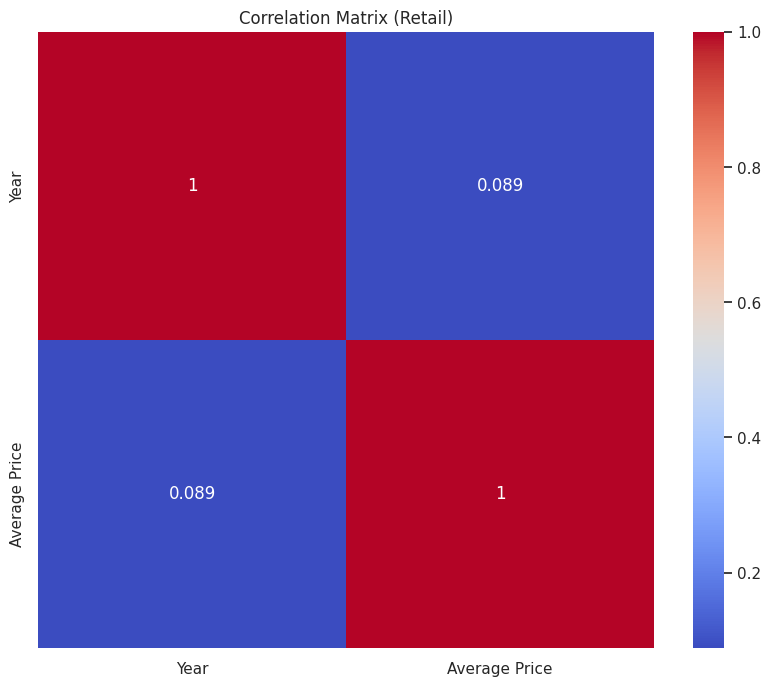

In [ ]:
# Filter the dataset for the "Retail" price type
retail_data = df[df['Price Type'] == 'Retail']

# Convert the Average Price column to numeric, ignoring non-convertible values
retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')

# Calculate the correlation matrix
correlation_matrix = retail_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Retail)')
plt.show()


<ipython-input-24-5a854a2e386a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')
<ipython-input-24-5a854a2e386a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = wholesale_data.corr()


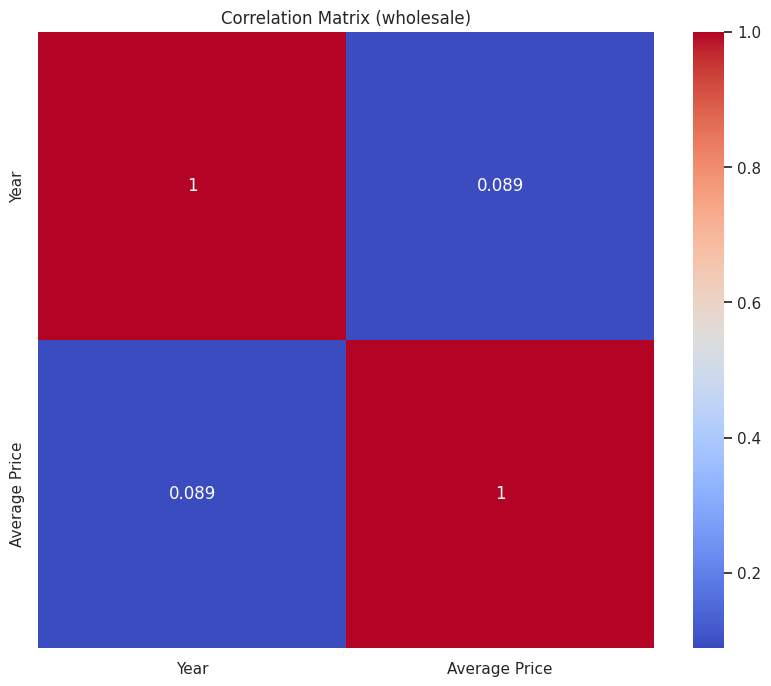

In [ ]:
# Filter the dataset for the "Retail" price type
wholesale_data = df[df['Price Type'] == 'Wholesale']

# Convert the Average Price column to numeric, ignoring non-convertible values
wholesale_data['Average Price'] = pd.to_numeric(wholesale_data['Average Price'].str.replace(',', ''), errors='coerce')

# Calculate the correlation matrix
correlation_matrix = wholesale_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (wholesale)')
plt.show()


<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

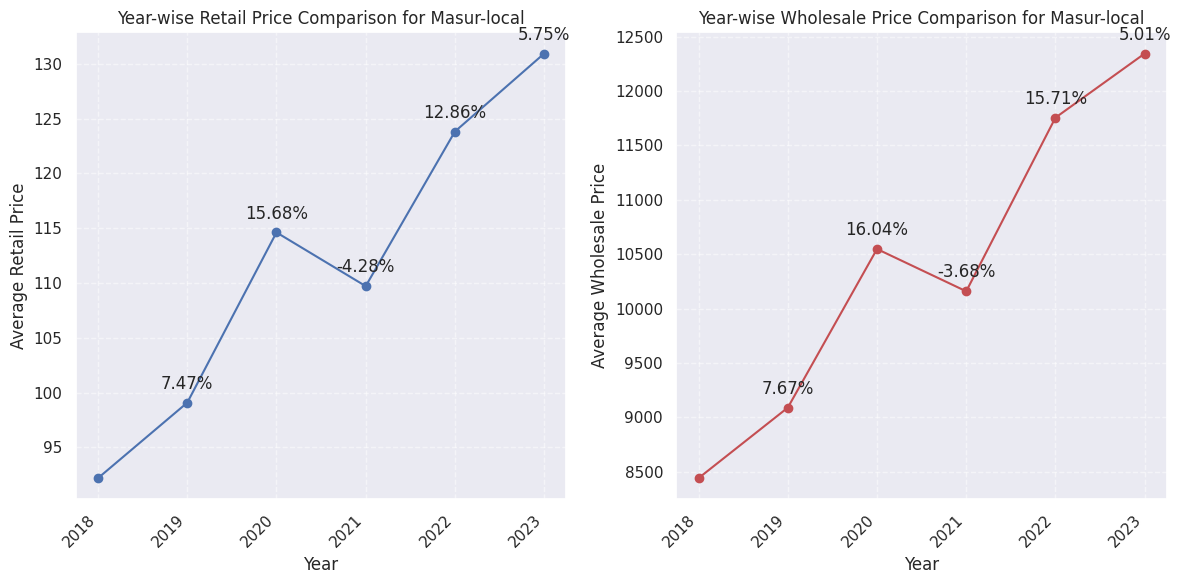

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

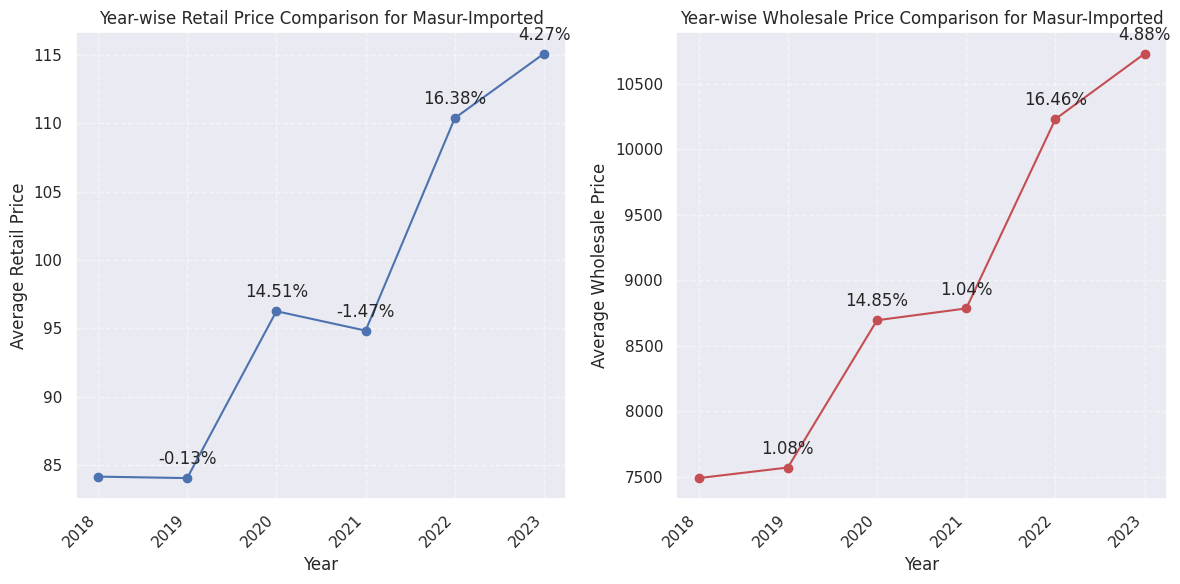

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

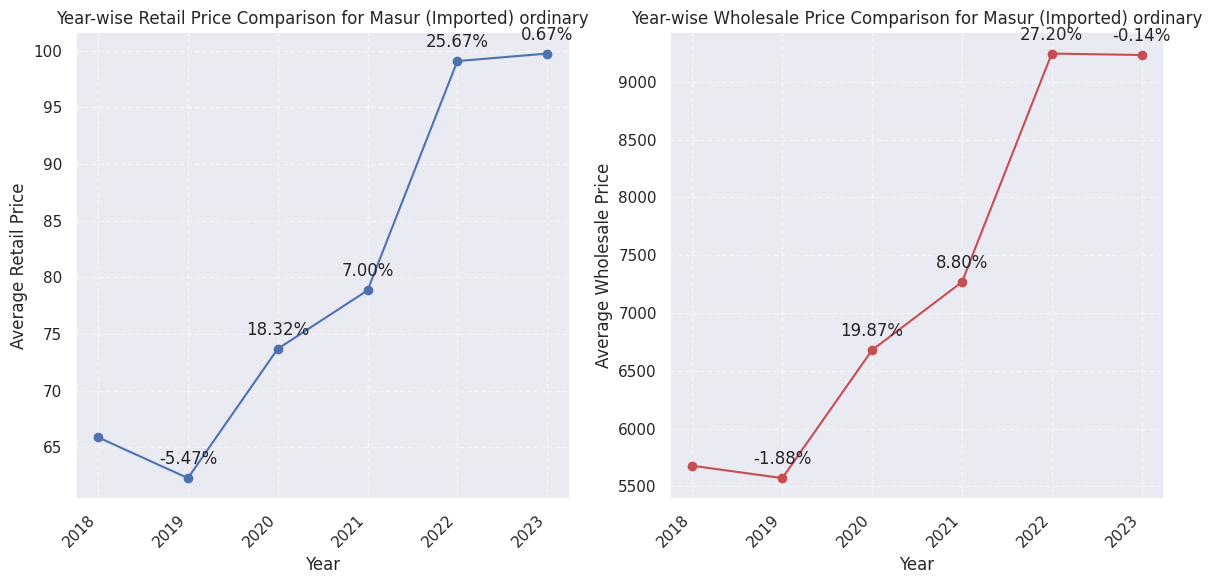

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

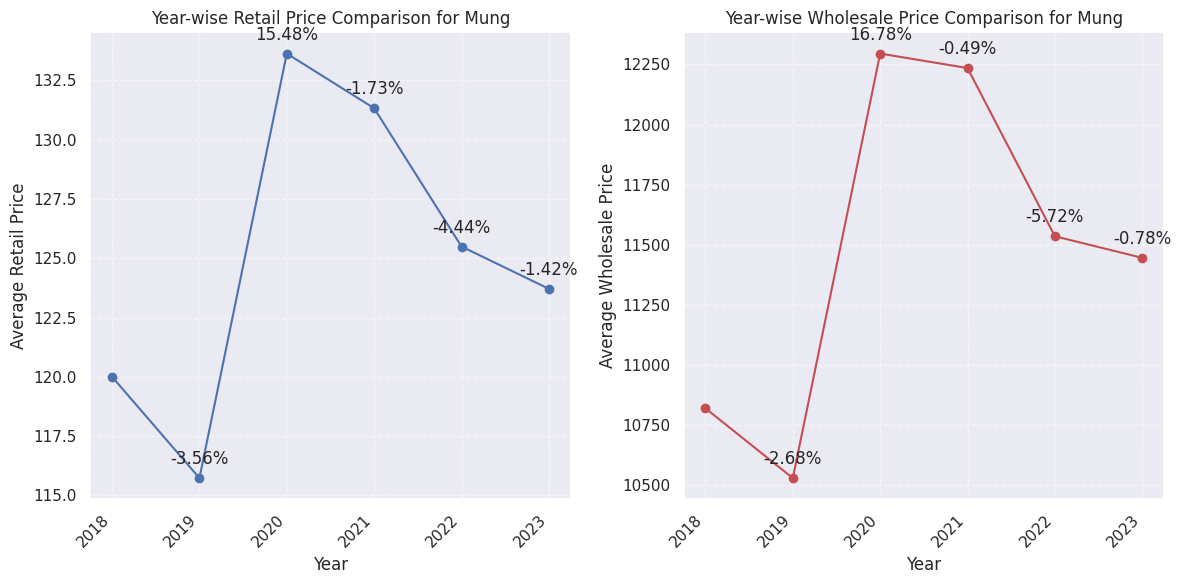

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

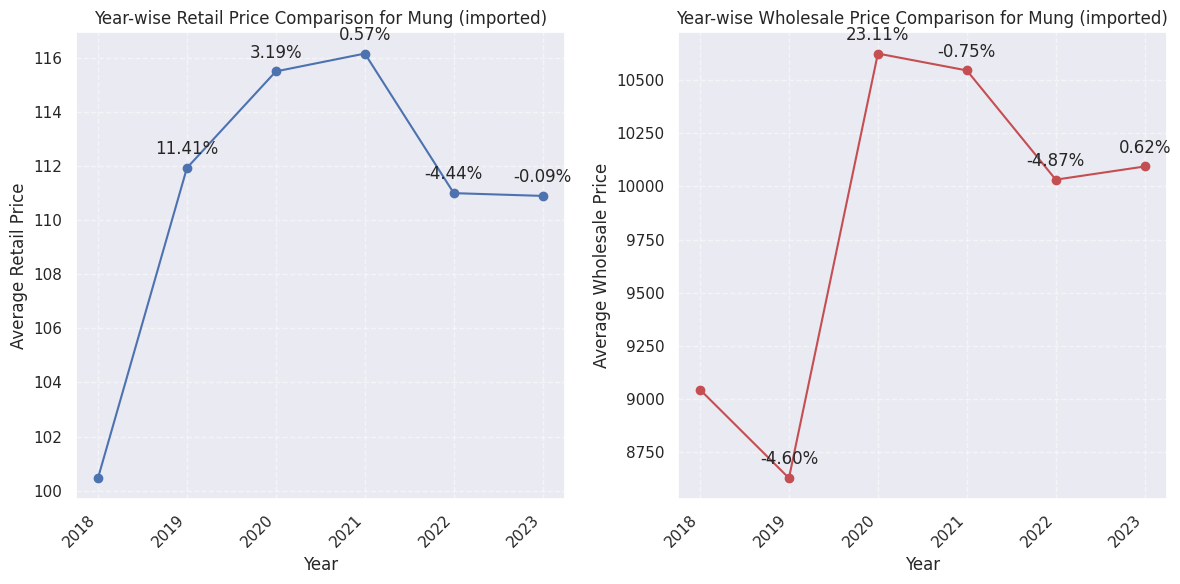

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

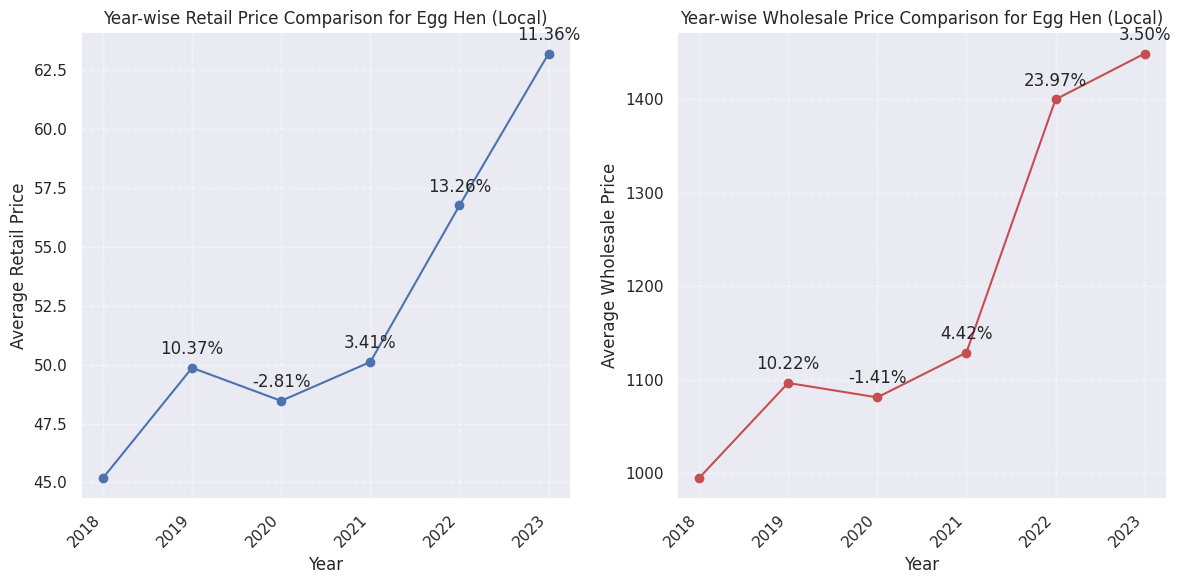

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

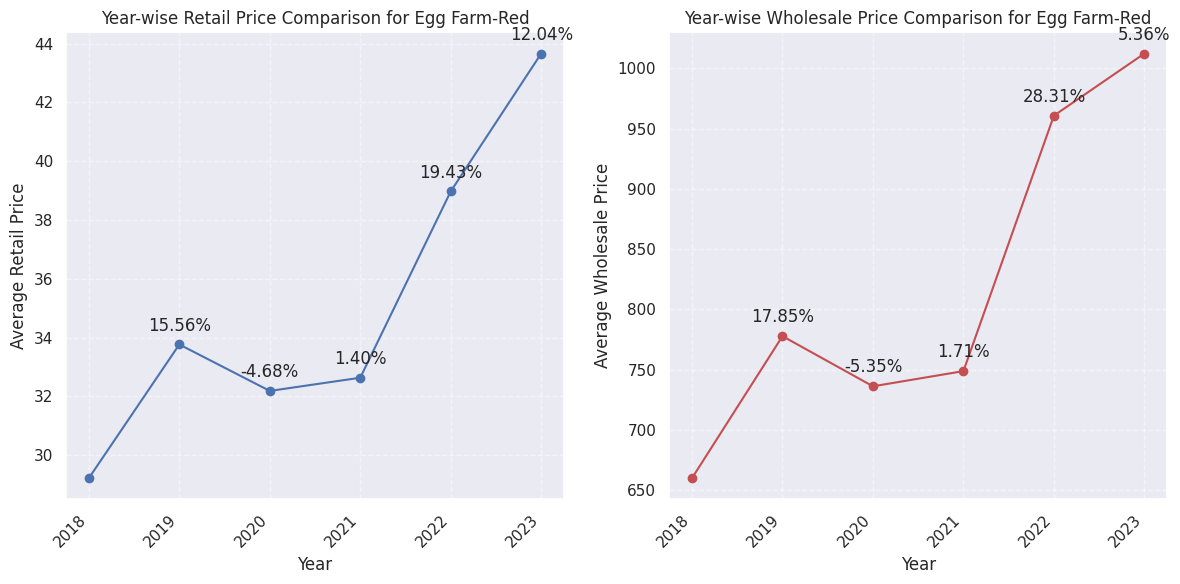

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

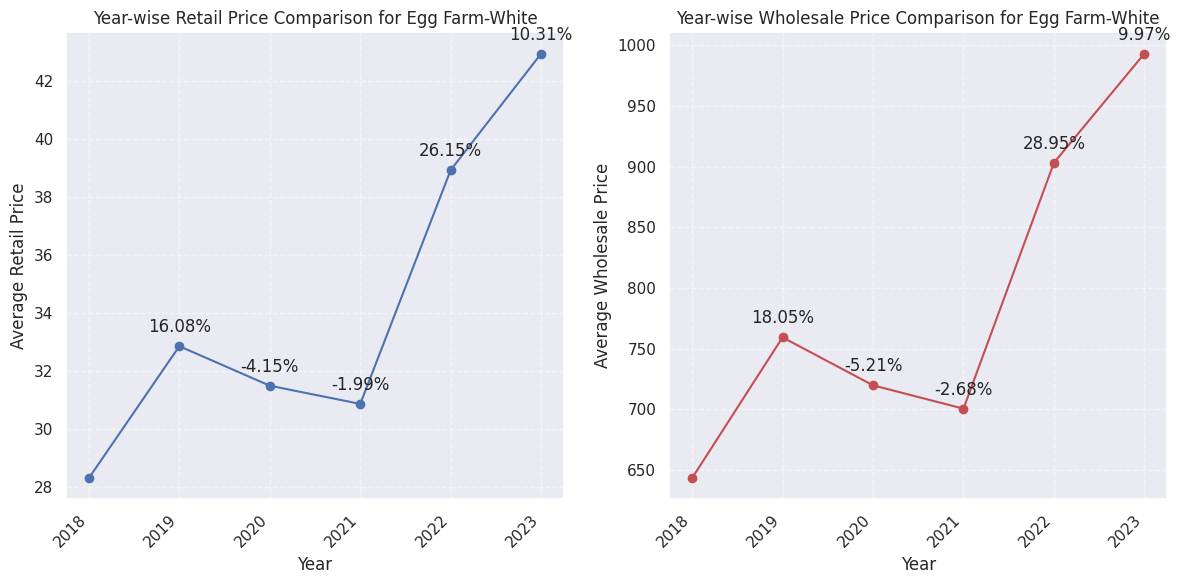

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

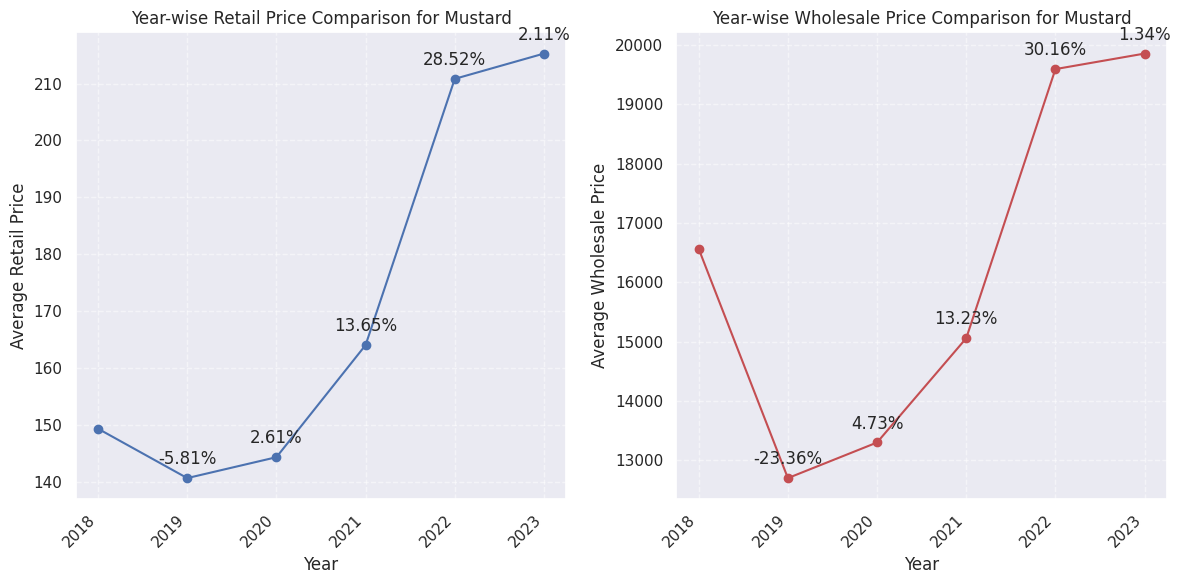

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

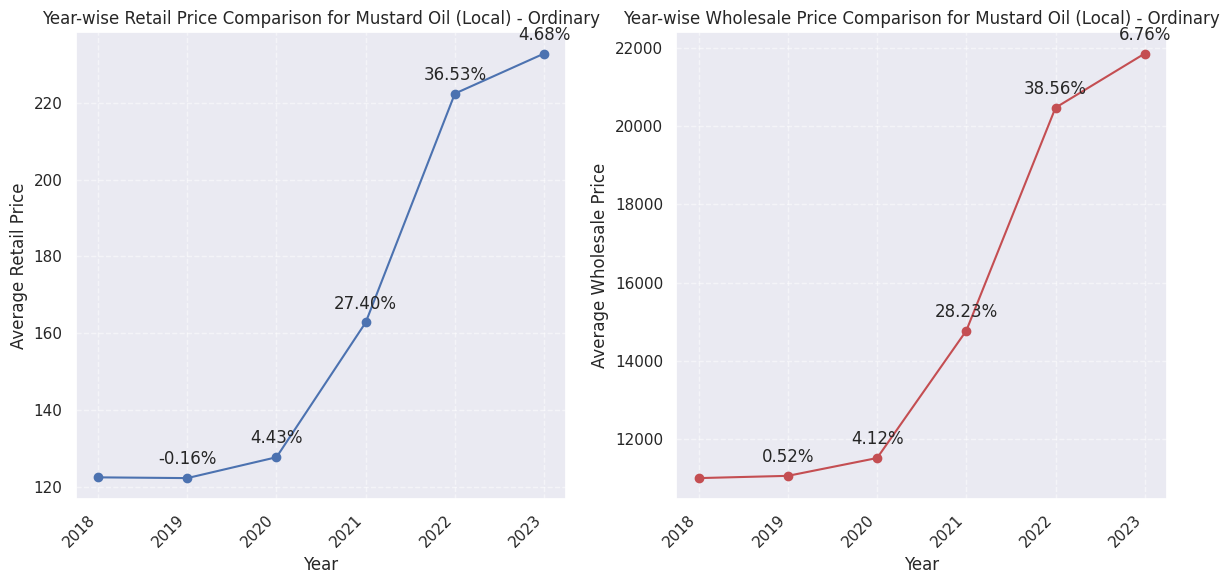

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

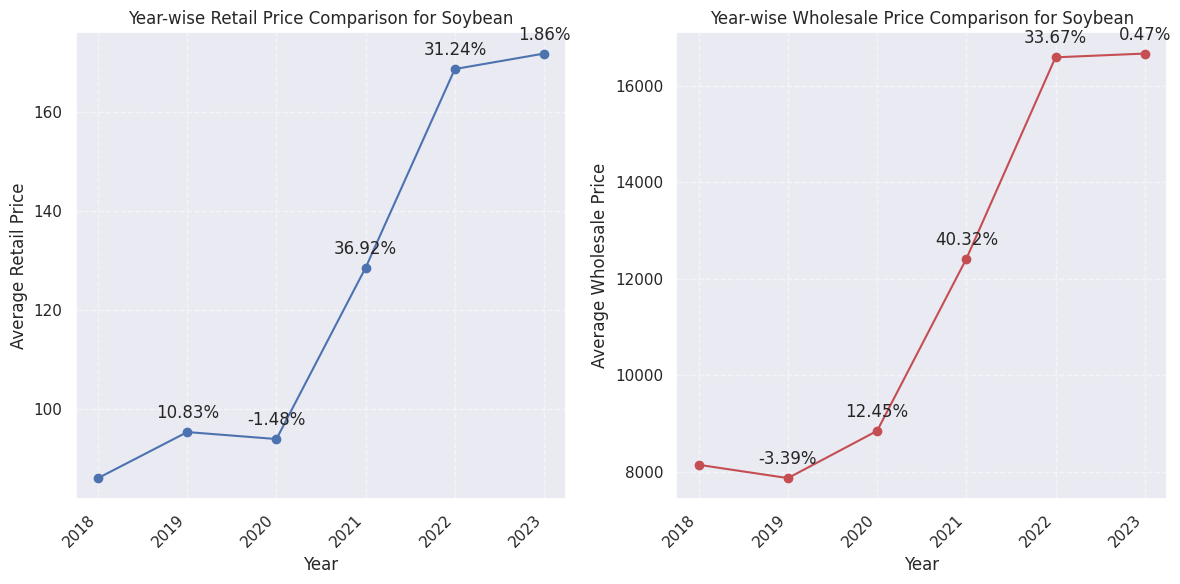

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

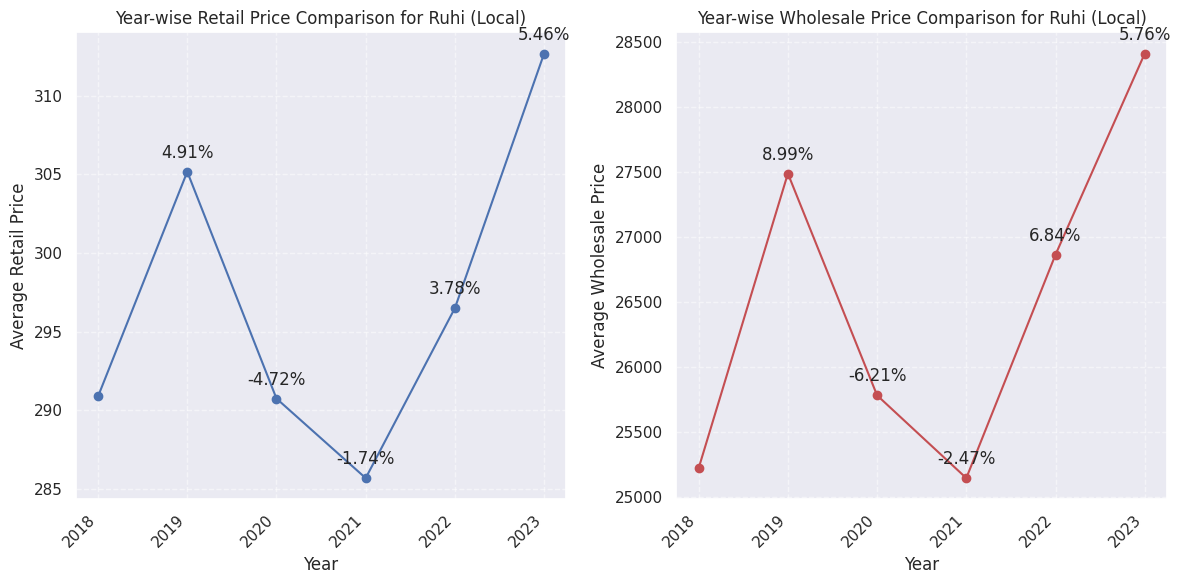

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

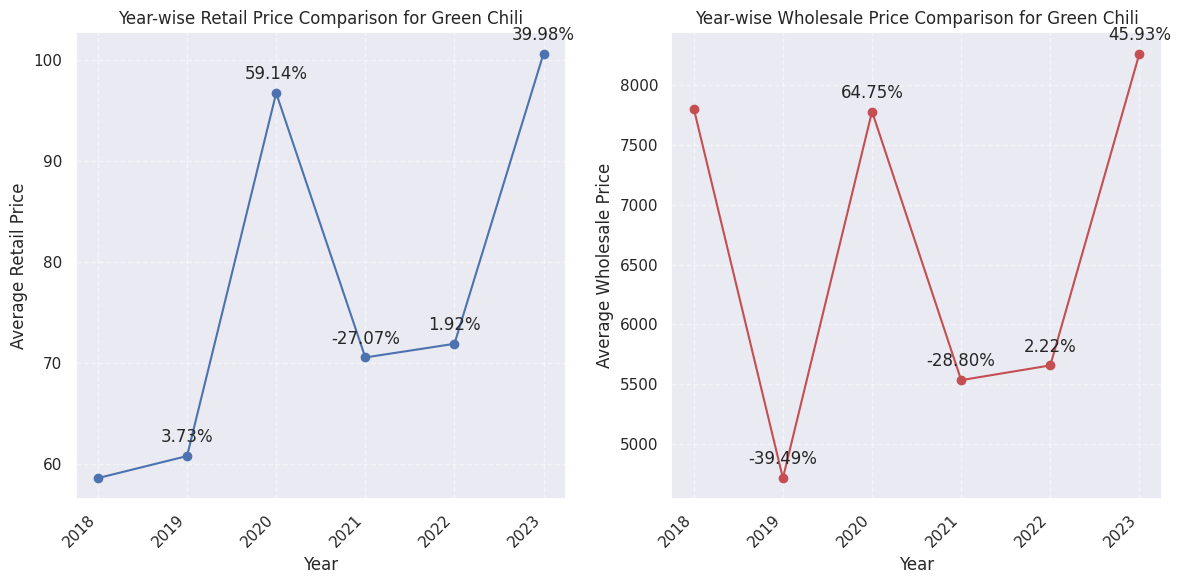

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

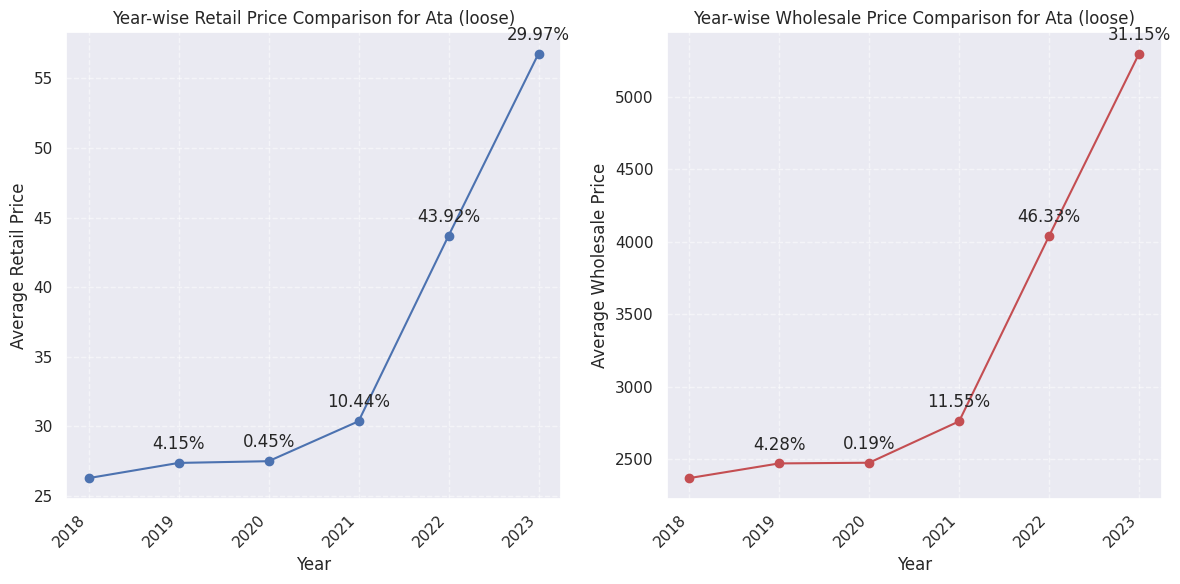

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

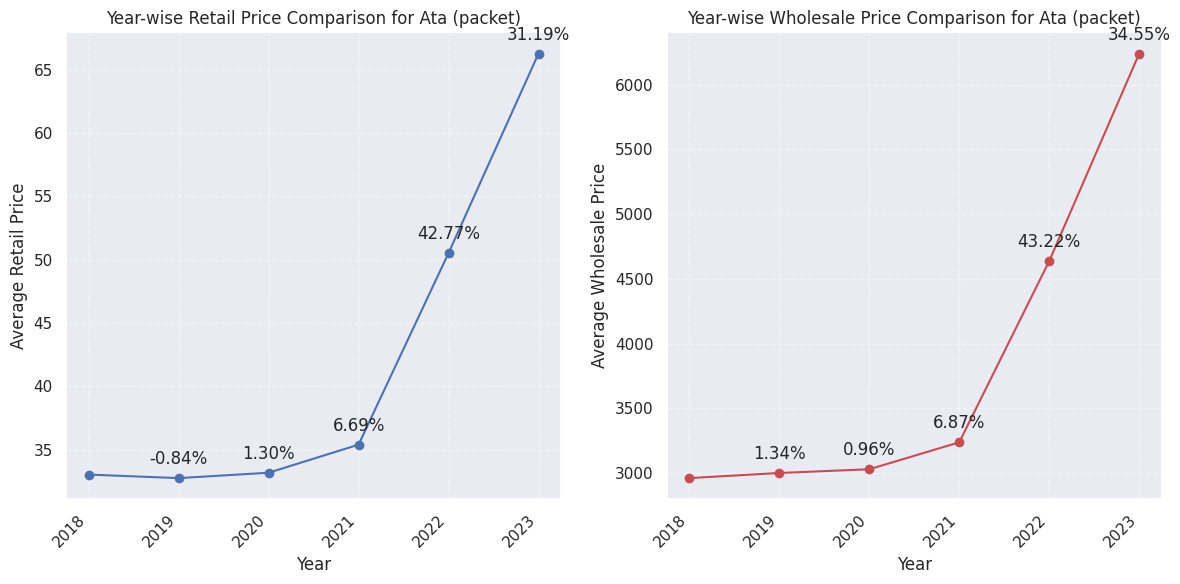

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

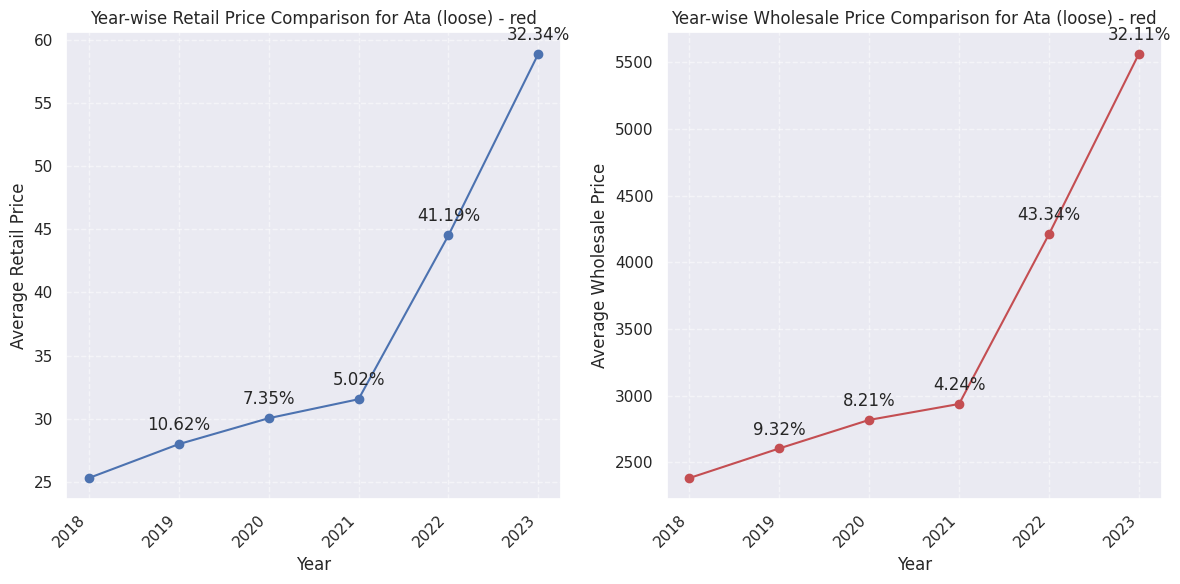

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

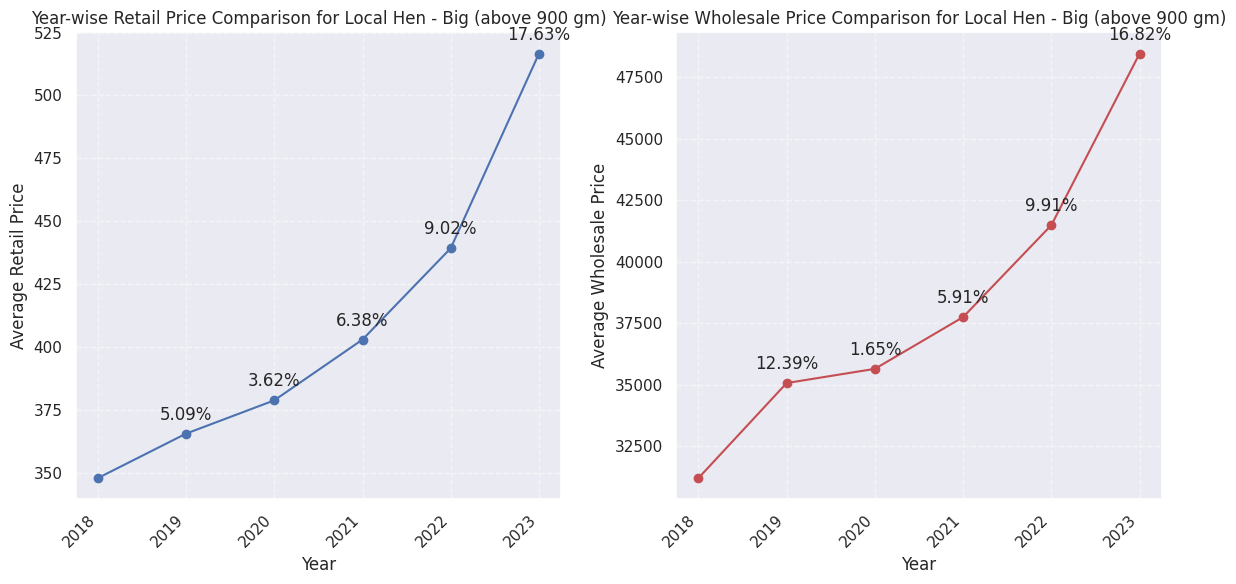

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

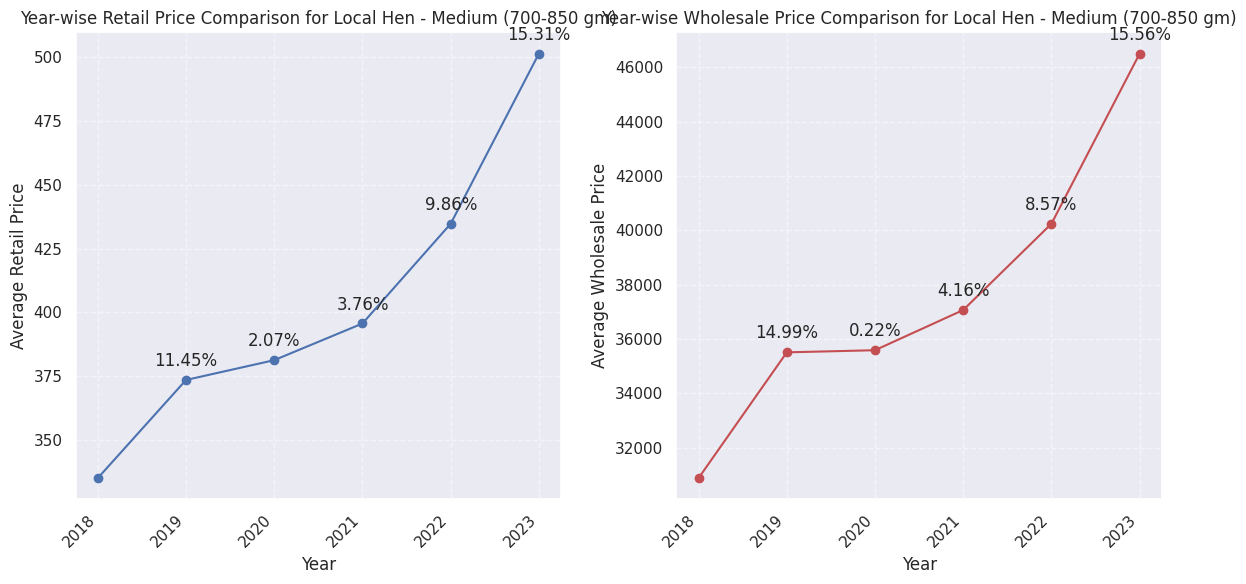

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

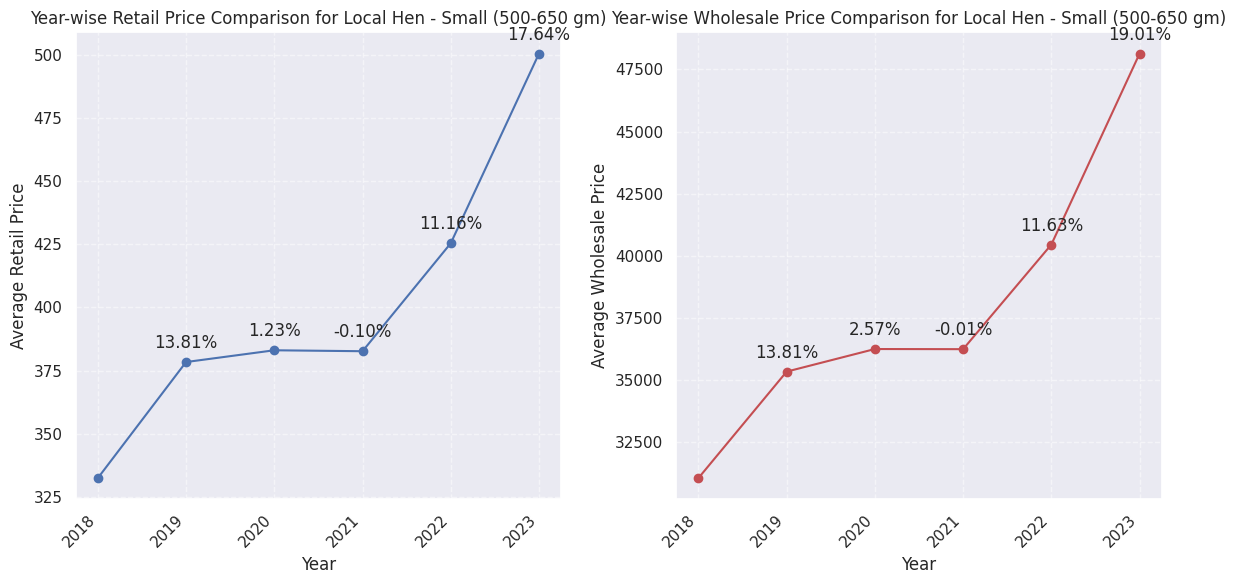

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

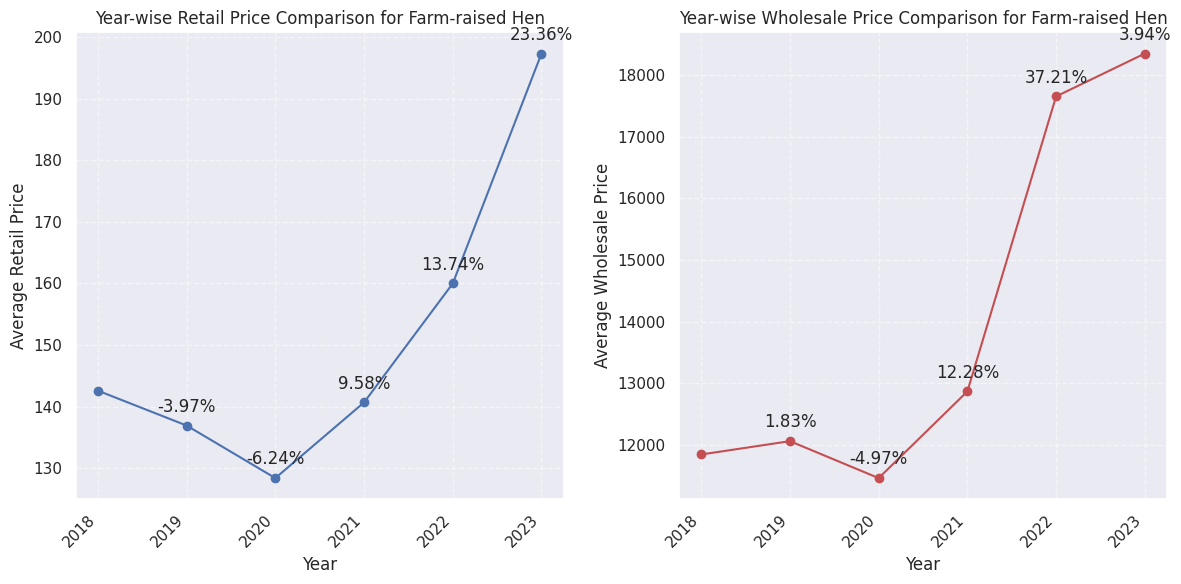

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

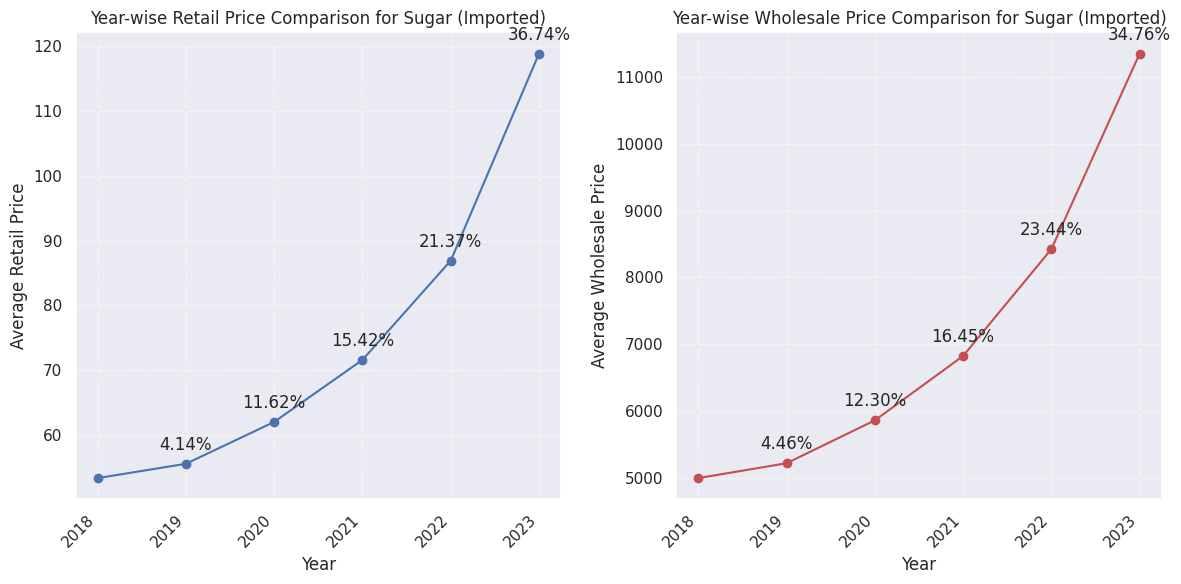

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

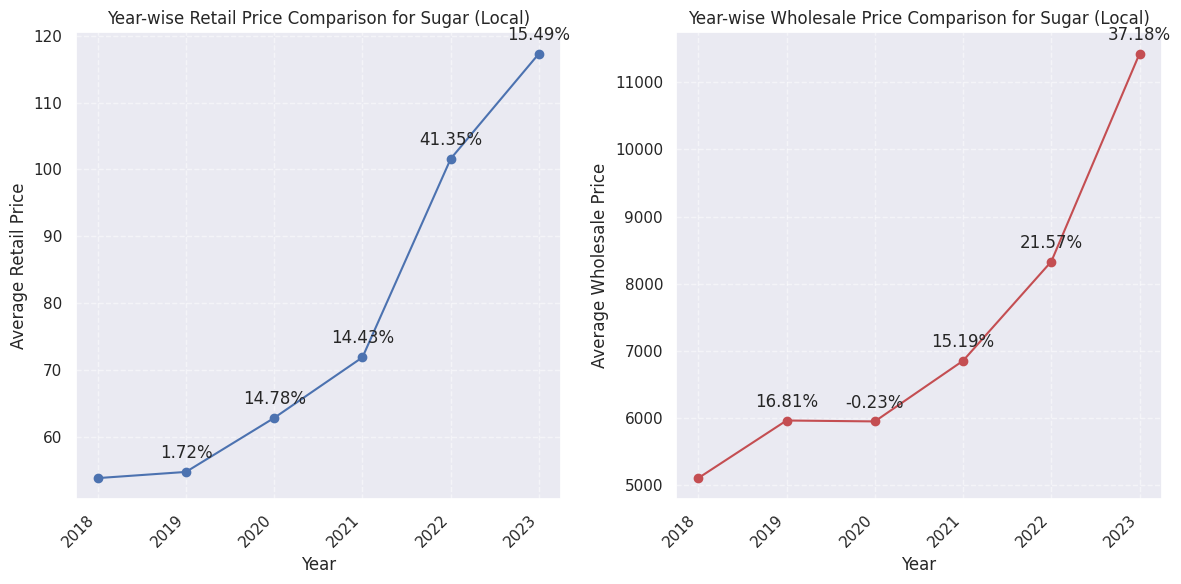

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

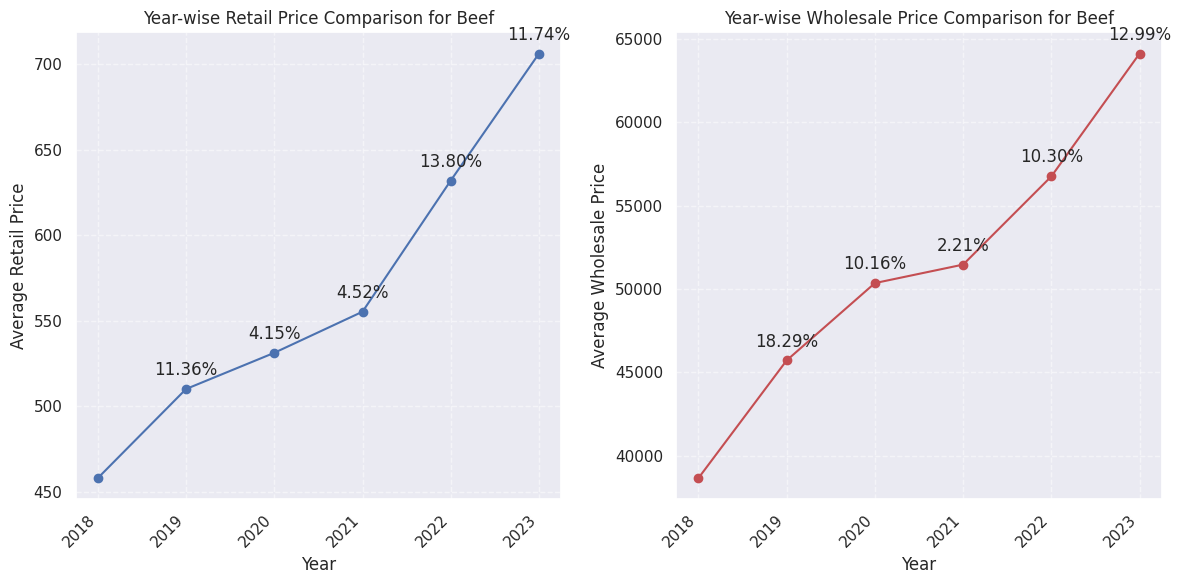

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

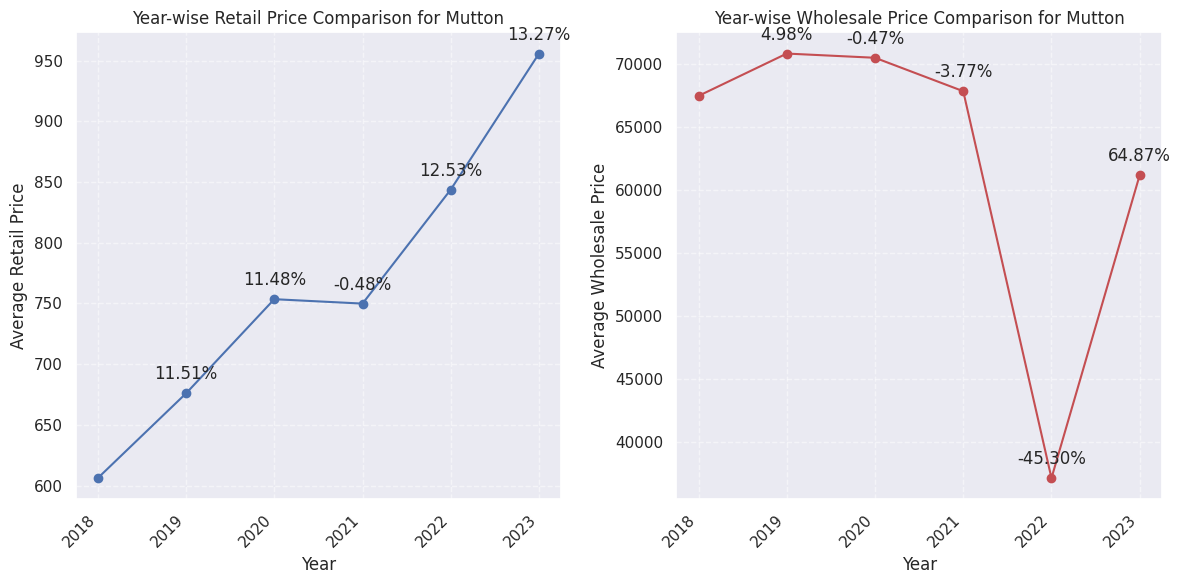

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

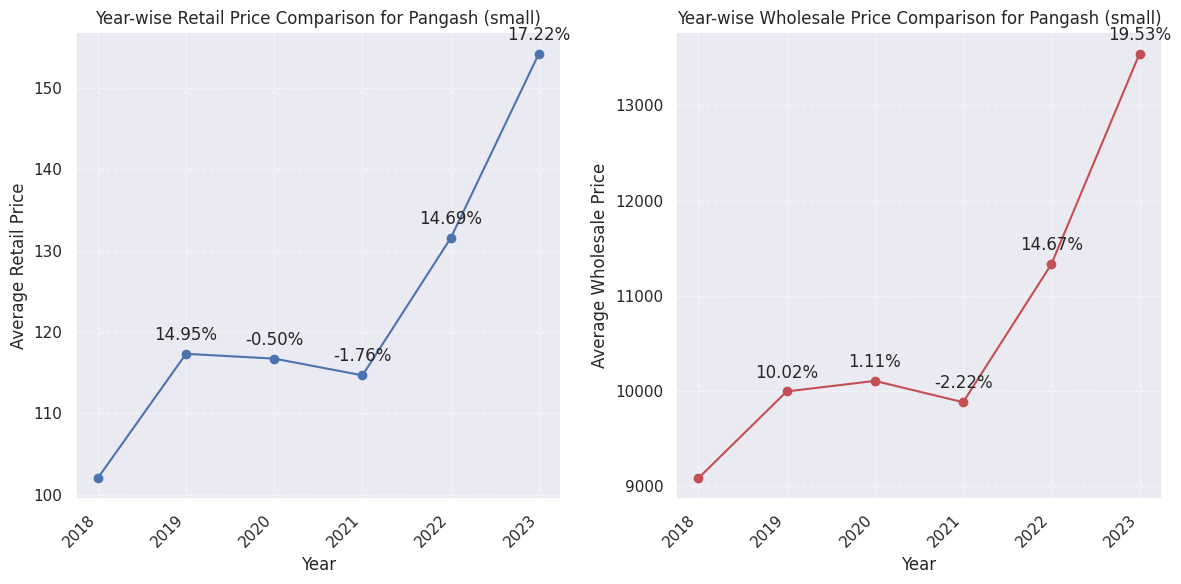

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

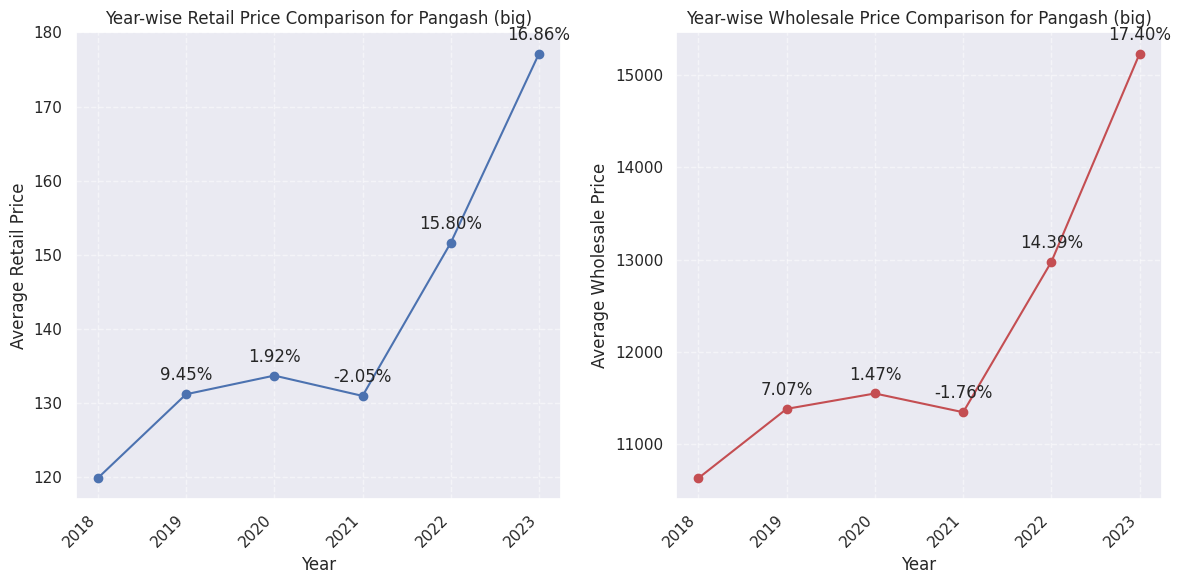

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

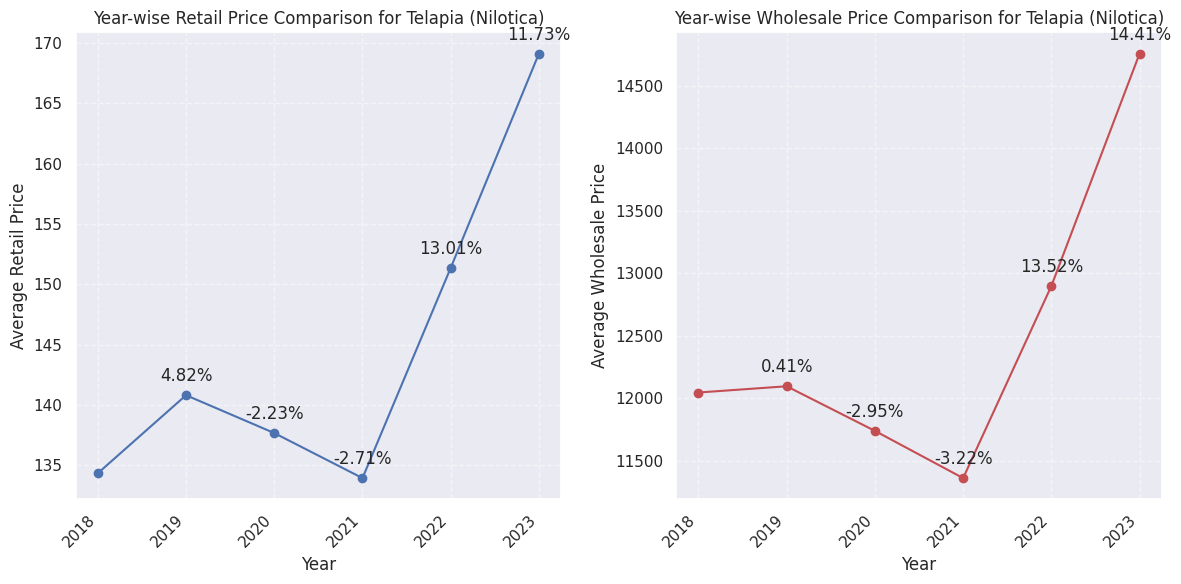

<ipython-input-25-8d03d025ac98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')
<ipython-input-25-8d03d025ac98>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
<ipython-input-25-8d03d025ac98>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

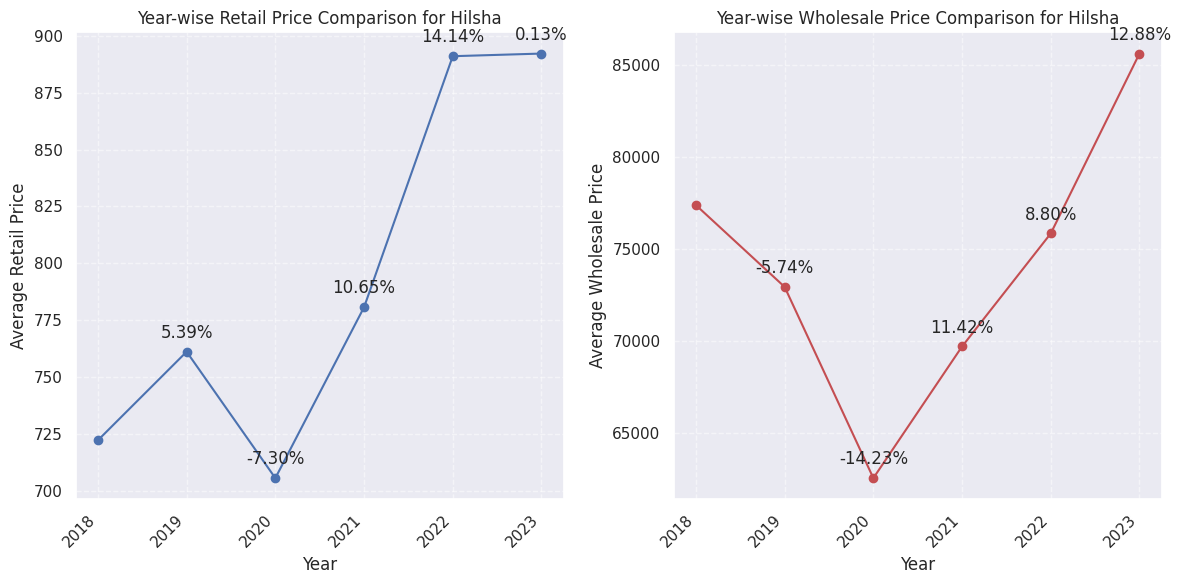

In [ ]:
# Get the list of unique commodities
commodities = df['Commodity'].unique()

# Iterate over each commodity
for commodity in commodities:
    # Filter the dataset for Retail and Wholesale price types and the current commodity
    retail_data = df[(df['Price Type'] == 'Retail') & (df['Commodity'] == commodity)]
    wholesale_data = df[(df['Price Type'] == 'Wholesale') & (df['Commodity'] == commodity)]

    # Convert the Average Price column in retail data to numeric, ignoring non-convertible values
    retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'], errors='coerce')

    # Remove commas from the price columns in wholesale data and convert them to numeric
    wholesale_data['Lowest Price'] = wholesale_data['Lowest Price'].str.replace(',', '').astype(float)
    wholesale_data['Highest Price'] = wholesale_data['Highest Price'].str.replace(',', '').astype(float)
    wholesale_data['Average Price'] = wholesale_data['Average Price'].str.replace(',', '').astype(float)

    # Group the retail data by year and calculate the average retail price for each year
    yearly_retail_prices = retail_data.groupby('Year')['Average Price'].mean().reset_index()

    # Group the wholesale data by year and calculate the average wholesale price for each year
    yearly_wholesale_prices = wholesale_data.groupby('Year')['Average Price'].mean().reset_index()

    # Calculate the percentage change in retail prices year-on-year
    retail_price_percentage_change = yearly_retail_prices['Average Price'].pct_change() * 100

    # Calculate the percentage change in wholesale prices year-on-year
    wholesale_price_percentage_change = yearly_wholesale_prices['Average Price'].pct_change() * 100

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot retail prices
    ax1.plot(yearly_retail_prices['Year'], yearly_retail_prices['Average Price'], marker='o', linestyle='-', color='b')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Retail Price')
    ax1.set_title(f'Year-wise Retail Price Comparison for {commodity}')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.set_xticks(yearly_retail_prices['Year'])
    ax1.set_xticklabels(yearly_retail_prices['Year'], rotation=45, ha='right')

    # Add percentage labels to the retail plot
    for i in range(1, len(yearly_retail_prices)):
        percentage_change = retail_price_percentage_change[i]
        ax1.annotate(f'{percentage_change:.2f}%', (yearly_retail_prices['Year'][i], yearly_retail_prices['Average Price'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
    # Plot wholesale prices
    ax2.plot(yearly_wholesale_prices['Year'], yearly_wholesale_prices['Average Price'], marker='o', linestyle='-', color='r')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Wholesale Price')
    ax2.set_title(f'Year-wise Wholesale Price Comparison for {commodity}')
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.set_xticks(yearly_wholesale_prices['Year'])
    ax2.set_xticklabels(yearly_wholesale_prices['Year'], rotation=45, ha='right')

    # Add percentage labels to the wholesale plot
    for i in range(1, len(yearly_wholesale_prices)):
        percentage_change = wholesale_price_percentage_change[i]
        ax2.annotate(f'{percentage_change:.2f}%', (yearly_wholesale_prices['Year'][i], yearly_wholesale_prices['Average Price'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
    # Adjust the layout
    plt.tight_layout()


    # Show the plot
    plt.show()

<ipython-input-26-7dcedef663e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')


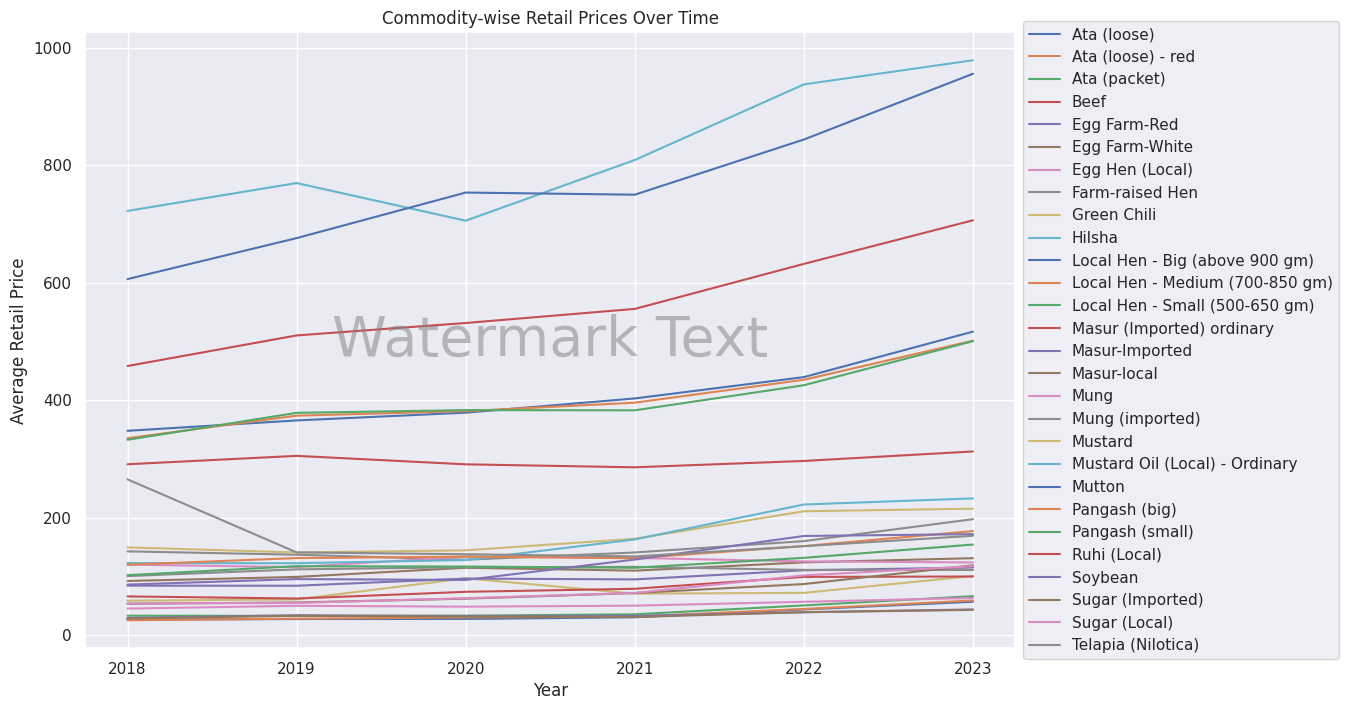

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for the "Retail" price type
retail_data = df[df['Price Type'] == 'Retail']

# Convert the Average Price column to numeric, ignoring non-convertible values
retail_data['Average Price'] = pd.to_numeric(retail_data['Average Price'].str.replace(',', ''), errors='coerce')

# Aggregate duplicate entries by taking the average retail price
retail_data = retail_data.groupby(['Year', 'Commodity'])['Average Price'].mean().reset_index()

# Pivot the data to have commodities as columns and years as index
pivot_data = retail_data.pivot(index='Year', columns='Commodity', values='Average Price')

# Create line chart for commodity-wise retail prices over time
plt.figure(figsize=(12, 8))
for commodity in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[commodity], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Retail Price')
plt.title('Commodity-wise Retail Prices Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Add watermark
plt.text(0.5, 0.5, 'Watermark Text', fontsize=40, color='gray', alpha=0.5,
         ha='center', va='center', transform=plt.gca().transAxes)

plt.show()
